<h1>Continuation of Lecture 1, September 8, 2025 </h1>

<h1>Stationary series</h1>

Marta Boczon

Department of Economics

Copnehagen Business School

mbo.eco@cbs.dk

# Effect of a shock on AR process

In an AR($p$) process, the impact of a shock at time $t$ persists and gradually decays but never fully disappears.

This means that the effect of a shock is felt indefinitely, although its influence becomes weaker over time. In other words, an AR($p$) model incorporates the history of all prior shocks, with their impact fading as they move further into the past. This makes AR processes well-suited for modeling phenomena that evolve smoothly rather than jumping abruptly. For example, body temperature does not fluctuate wildly from one moment to the next — instead, it adjusts gradually, and current measurements remain close to recent ones.

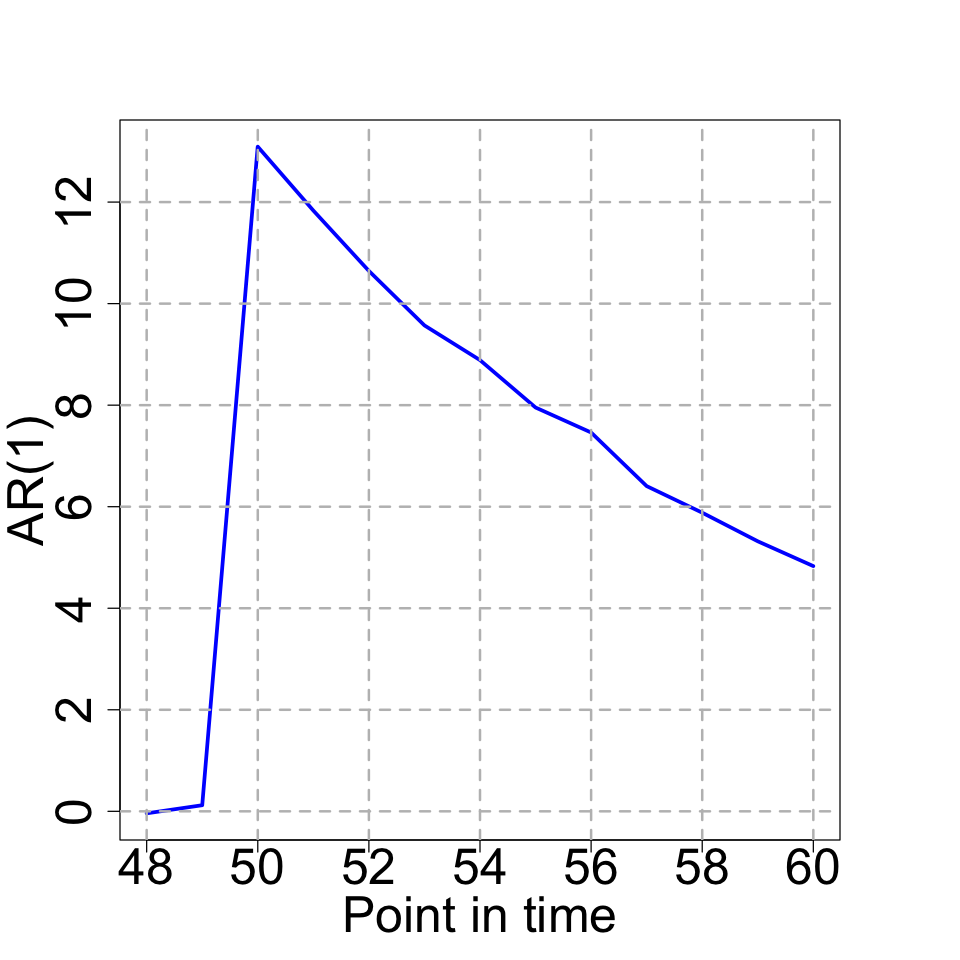

In [1]:
# Define the number of time periods (observations) to simulate
T = 200

# Initialize a vector of length T with zeros 
# to store the AR(1) process values
ar1h = rep(0, T)

# Set the coefficient (AR(1) parameter)
beta = 0.9

# Generate shocks (innovations) from a Normal distribution
set.seed(123)               # set seed for reproducibility
e = rnorm(T, mean = 0, sd = 0.2)

# Generate the AR(1) process with a large shock at t = 50
for (t in 2:T) {
  if (t == 50) { 
    e[t] = e[t] + 13 # insert a big positive shock at time t = 50
  }
  # AR(1) recursion
  ar1h[t] = beta * ar1h[t-1] + e[t]
}

# Set plotting options
options(repr.plot.width = 8, repr.plot.height = 8)
par(mar = c(5, 5, 5, 5))

# Plot a zoomed-in window around the shock (t = 48 to 60)
plot(
  c(48:60), ar1h[48:60],
  type = "l", col = "blue", lwd = 3,            # line plot
  xlab = "Point in time", ylab = "AR(1)",       # axis labels
  cex.lab = 2.5, cex.axis = 2.5                 # scaling factors
)

# Add gridlines for readability
grid(nx = NULL, ny = NULL,
     lty = 2,      # dashed lines
     col = "gray", # grid color
     lwd = 2)      # grid width

# Effect of a shock on MA process
For MA processes, the effect of a shock fully disappears after $q$ periods.

For example, in an MA(1) process, a shock at time $t$ influences $y_t$ (through the current shock) and $y_{t+1}$ (through the lagged shock). By $t+2$, its effect is gone.

In general, for an MA($q$) process, each shock affects the series for at most $q+1$ periods before vanishing completely. The magnitude of its impact during those periods depends on the size of the coefficients $\beta_i$.

This is in sharp contrast to AR($p$) processes, where the effect of a single shock persists indefinitely — fading gradually but never truly disappearing. Thus, AR processes have infinite memory, while MA processes have finite memory.

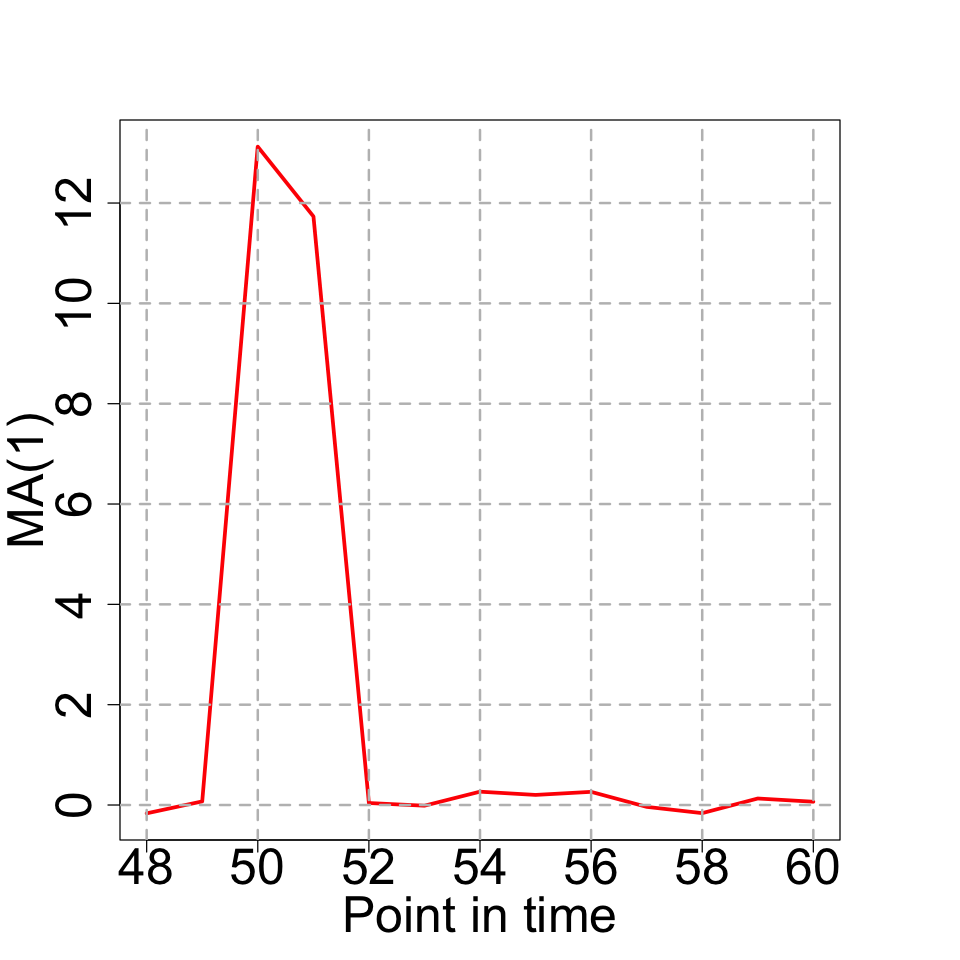

In [2]:
# Define the number of time periods (observations) to simulate
T = 200

# Initialize a vector of length T with zeros 
# to store the MA(1) process values
ma1h = rep(0, T)

# Set the coefficient (MA(1) parameter)
beta = 0.9

# Generate shocks (innovations) from a Normal distribution
set.seed(123)               # set seed for reproducibility
e = rnorm(T, mean = 0, sd = 0.2)

# Generate the MA(1) process with a big shock at t = 50
for (t in 2:T) {
  if (t == 50) { 
    e[t] = e[t] + 13 # insert a big positive shock at time t = 50
  }
  # MA(1) recursion
  ma1h[t] = beta * e[t-1] + e[t]
}

# Set plotting options
options(repr.plot.width = 8, repr.plot.height = 8)
par(mar = c(5, 5, 5, 5))

# Plot a zoomed-in window around the shock (t = 48 to 60)
plot(
  c(48:60), ma1h[48:60],
  type = "l", col = "red", lwd = 3,             # line plot
  xlab = "Point in time", ylab = "MA(1)",       # axis labels
  cex.lab = 2.5, cex.axis = 2.5                 # scaling factors
)

# Add gridlines for readability
grid(nx = NULL, ny = NULL,
     lty = 2,      # dashed lines
     col = "gray", # grid color
     lwd = 2)      # grid width

# Exercise:

Simulate 1,000 observations from an AR(3) process, and an MA(3) process, using the coefficients:

$\beta_1 = 0.2$

$\beta_2 = 0.1$

$\beta_3 = 0.2$

Introduce a large random shock at time $t = 800$, and plot the series to compare how the effect of the shock evolves in the AR(3) versus the MA(3) process.

<h1>Lecture 2, September 8, 2025 </h1>

<h1>Non-stationary series</h1>

Marta Boczon

Department of Economics

Copnehagen Business School

mbo.eco@cbs.dk

# Introduction

**Stationarity is needed for statistical inference because of the difficulties in modeling data whose structure changes over time.**

**Strict stationarity**

   1. A time series is strictly stationary if the joint distribution of $(y_t, y_{t+1}, …, y_{t+k})$ is the same for all $t$.

   2. In practice: all statistical properties (mean, variance, covariance, higher moments) are time-invariant.

   3. Very strong condition — rarely holds in real data.
    

**Weak (or covariance) stationarity**

   1. A weaker form of stationarity — often sufficient for econometrics.
   2. Most time series models (ARMA, VAR, etc.) assume weak stationarity.
   3. Requires:

       3.1 Constant mean: $\color{blue}{E(y_t) = \mu}$ for all $t$

       3.2 Constant variance: $\color{blue}{Var(y_t) = \sigma^2}$ for all $t$

        3.3 Covariance depends only on the lag between observations, not on time itself:
        $\color{blue}{Cov(y_t, y_{t+h}) = \gamma(h)}$ for all $t$

**Examples of non-stationary processes:**
- a) $\color{blue}{y_t = \beta_0 + \beta_1t+ϵ_t}$
- b) $\color{blue}{y_t = \beta_0 + \beta_1y_{t-1} + \beta_2t+ϵ_t, \quad |\beta_1| < 1}$
- c) $\color{blue}{y_t=y_{t-1}+ϵ_t}$
- d) $\color{blue}{y_t=β_0+y_{t-1}+ϵ_t}$
- e) $\color{blue}{y_t=β_0+y_{t-1}+\beta_1t+ϵ_t}$

In [3]:
#install.packages('pracma')
#install.packages('urca')
#install.packages('stargazer')

# Example a)
# Constant and deterministic trend

**Example a:**
$y_t$ as a function of time $t$

 $$\color{blue}{y_t = \beta_0 + \beta_1t+ϵ_t},$$
 
 where

- $y_t$: the value of the time series at time $t$  
- $t$: time (e.g., day, month, year)  
- $\beta_0$: intercept, drift (it adds a constant expected change each period, regardless of $t$) 
- $\beta_1$: slope on deterministic trend (time-driven component)  
- $\epsilon_t$: random error term

**This process is *non-stationary* because the mean of $y_t$ changes over time due to the trend $\beta_1 t$.**

Expected value of $y_t$:

$$\color{blue}{\mathbb{E}(y_t)=\beta_0 + \beta_1 \color{red}{t}}$$

Hence,

$\color{blue}{\mathbb{E}(y_1)=\beta_0+\beta_1},\quad \color{blue}{\mathbb{E}(y_2)=\beta_0+\color{red}{2}\beta_1},\quad \color{blue}{\mathbb{E}(y_3)=\beta_0+\color{red}{3}\beta_1},...$

**The expected value is not constant over time.**

Variance of $y_t$:

$$\color{blue}{\mathbb{Var}(y_t)=\sigma_{ϵ}^2}$$

**However, the variance is constant over time.**

<img src="COLOURBOX49899644.jpg" width="200" style="float:left;">





<div style="background-color:lightgrey; padding:10px; border-radius:5px;">

<b>Proof:</b>

$\mathbb{E}(y_t) = \mathbb{E}(\beta_0 + \beta_1 t+ϵ_t)=\underbrace{\mathbb{E}(\beta_0)}_{=\beta_0} + \underbrace{\mathbb{E}(\beta_1 t)}_{=\beta_1t}+\underbrace{\mathbb{E}(ϵ_t)}_{=0}=\beta_0 + \beta_1 t $

$\mathbb{Var}(y_t) = \mathbb{Var}(\beta_0+\beta_1 t+ϵ_t)=\underbrace{\mathbb{Var}(\beta_0)}_{=0} + \underbrace{\mathbb{Var}(\beta_1 t)}_{=0}+\underbrace{\mathbb{Var}(ϵ_t)}_{=\sigma^2_{ϵ}}=\sigma^2_{ϵ}$
</div>

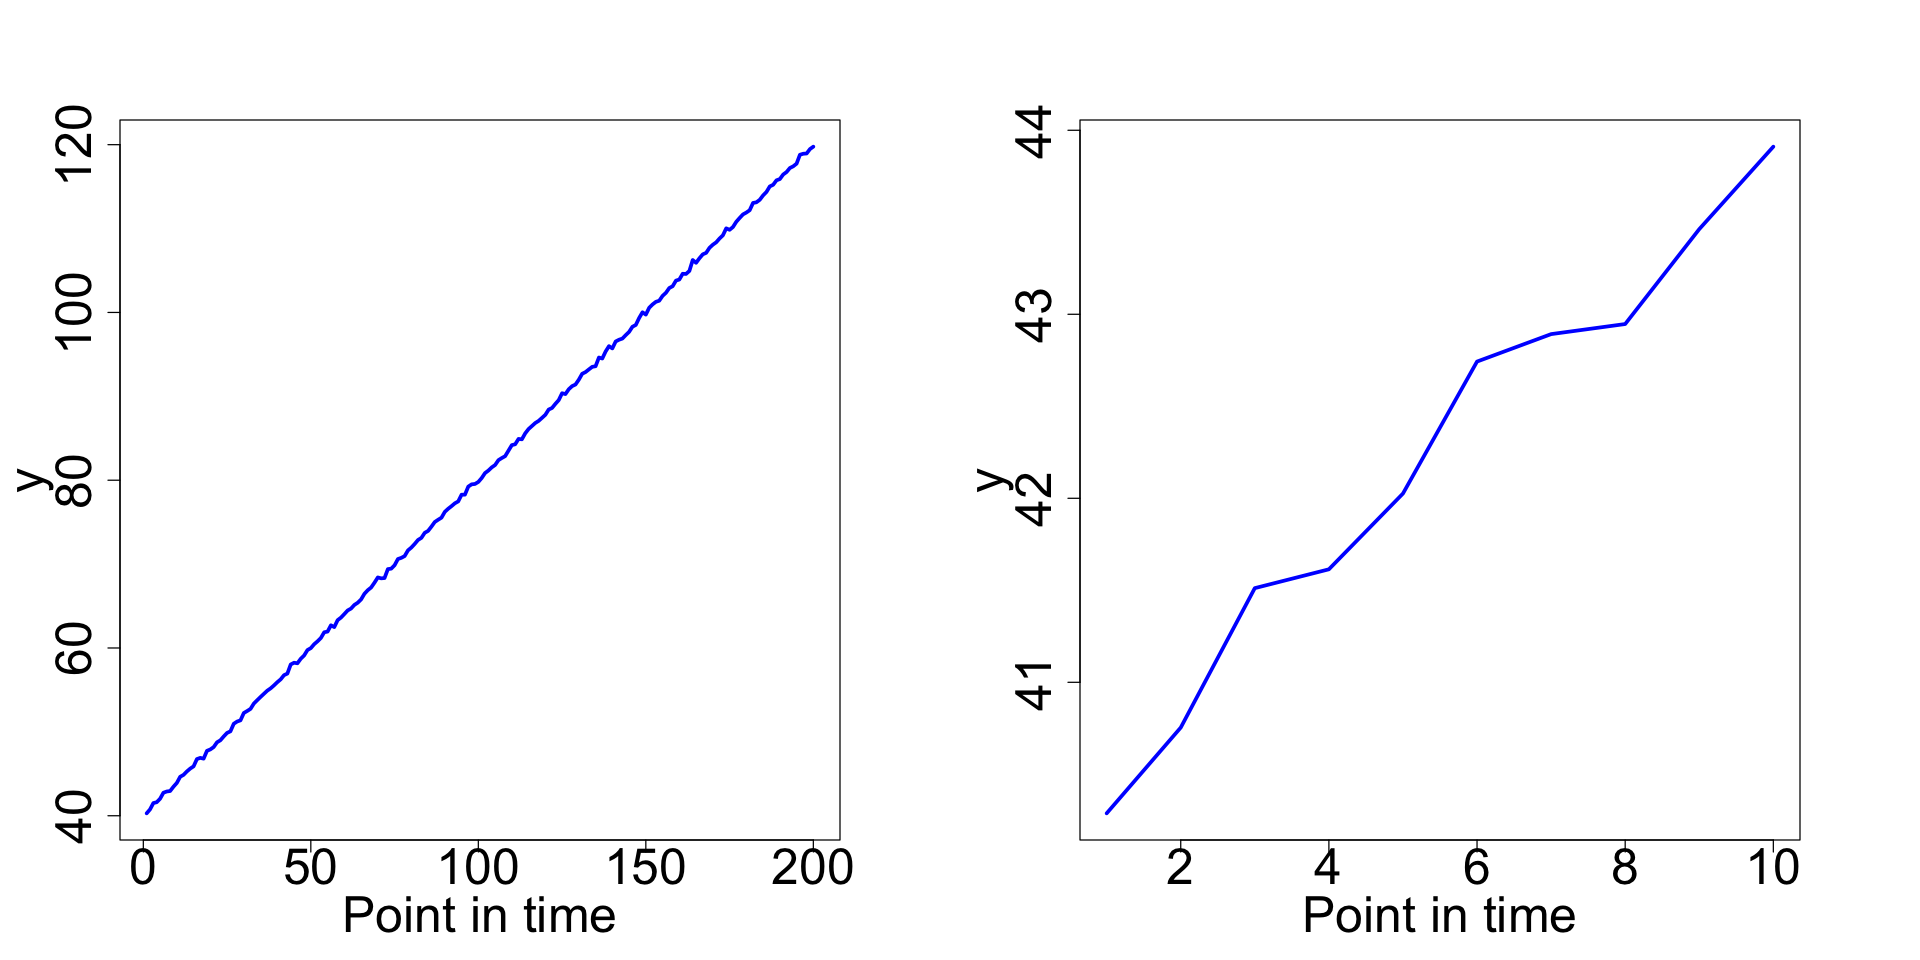

In [4]:
T = 200                     # Set the number of time periods (length of the series)
ex.a = rep(0, T)            # Create an empty vector of length T to store the simulated series
set.seed(123)               # Fix the random seed for reproducibility
e = rnorm(T, 0, 0.2)        # Generate T random errors from N(0, 0.2^2)
beta0 = 40                  # Set the intercept (starting level of the series)
beta1 = 0.4                 # Set the slope (deterministic trend)
t = 1:T                     # Create a time index from 1 to T

# Loop over each time period and compute the value of y_t
for (i in 1:T) {
  ex.a[i] = beta0 + beta1 * t[i] + e[i]
}

# Set plotting options: figure size
options(repr.plot.width=16, repr.plot.height=8)

# Set margins and layout: larger margins, 1 row and 2 plots side by side
par(mar = c(5, 5, 5, 5), mfrow = c(1, 2))

# Plot the entire time series
plot(ex.a, type="l", col="blue", 
     cex.lab=2.5, cex.axis=2.5,
     xlab= "Point in time", ylab = "y", lwd=3)

# Plot only the first 10 observations (zoom in to see short-run behavior)
plot(c(1:10), ex.a[1:10], type="l", col="blue",
     cex.lab=2.5, cex.axis=2.5,
     xlab= "Point in time", ylab = "y", lwd=3)

# Example b) 
# Constant, deterministic time trend, and past value of y

**Example b:**
$y_t$ as a function of time $t$ and $y_{t-1}$ (i.e., yesterday's value of $y_t$)

 $$\color{blue}{y_t = \beta_0 + \beta_1y_{t-1} + \beta_2t+ϵ_t, \quad |\beta_1| < 1}$$

- $y_t$: the value of the time series at time $t$  
- $y_{t-1}$: the lagged value of the series (yesterday’s $y_t$)  
- $t$: time (e.g., day, month, year)  
- $\beta_0$: intercept, drift (it adds a constant expected change each period, regardless of $t$) 
- $\beta_1$: autoregressive parameter (how strongly today’s value depends on yesterday’s value)  
- $\beta_2$: slope on deterministic trend (time-driven component)  
- $\epsilon_t$: random error term  

**This process is *non-stationary* because the deterministic trend term $\beta_2 t$ makes the mean of $y_t$ change over time. If $\beta_2 = 0$, the process could be stationary (as long as $|\beta_1| < 1$).**

Expected value of $y_t$:
 
 
$$\color{blue}{\mathbb{E}(y_t)=\frac{\beta_0}{1-\beta_1} + \frac{\beta_2\color{red}{t}}{1-\beta_2}-\frac{\beta_2\beta_1}{(1-\beta_1)^2}}$$

**We see that the expected value is not constant over time.**
 
 Variance of $y_t$:
 
 $$\color{blue}{\mathbb{Var}(y_t)=\frac{\sigma_{\epsilon}^2}{1-\beta_1^2}}$$
 
**However, the variance is constant over time.**

<img src="COLOURBOX49899644.jpg" width="200" style="float:left;">


<div style="background-color:lightgrey; padding:10px; border-radius:5px;">
    
<b>Proof:</b>
    
    
<b>1. Find the general recursive form of $ y_t $:</b>
   
   Begin by expanding $( y_t $ recursively by substituting $ y_{t-1}, y_{t-2}, \dots )$ which  gives the general recursive form:

   $$
   y_t = \sum_{j=0}^{\infty} \beta_1^j \left( \beta_0 + \beta_2 (t - j) + \epsilon_{t-j} \right)
   $$
   
<b>2. Simplify the general recursive form using the properties of the infinite sum of a geometric series:</b>
   
   Since $ |\beta_1| < 1 $, the powers of $ \beta_1 $ form a geometric series. Use the geometric series sum formula to simplify the expression:
   
   $$
   \sum_{j=0}^{\infty} \beta_1^j = \frac{1}{1 - \beta_1}
   $$
   
   Additionally, apply the known result for the sum of weighted terms $ j \beta_1^j$:
   
   $$
   \sum_{j=0}^{\infty} j \beta_1^j = \frac{\beta_1}{(1 - \beta_1)^2}
   $$
   
   These will help reduce the infinite sum to a manageable closed-form expression.
    
   
   
<b>3. Compute the expected value of $ y_t $:</b>
   
   Taking the expectation (variance) of both sides and using $ E[\epsilon_t] = 0 $ ($ E[\epsilon_t] = \sigma^2_{\epsilon} $), compute the expected value (variance).
</div>

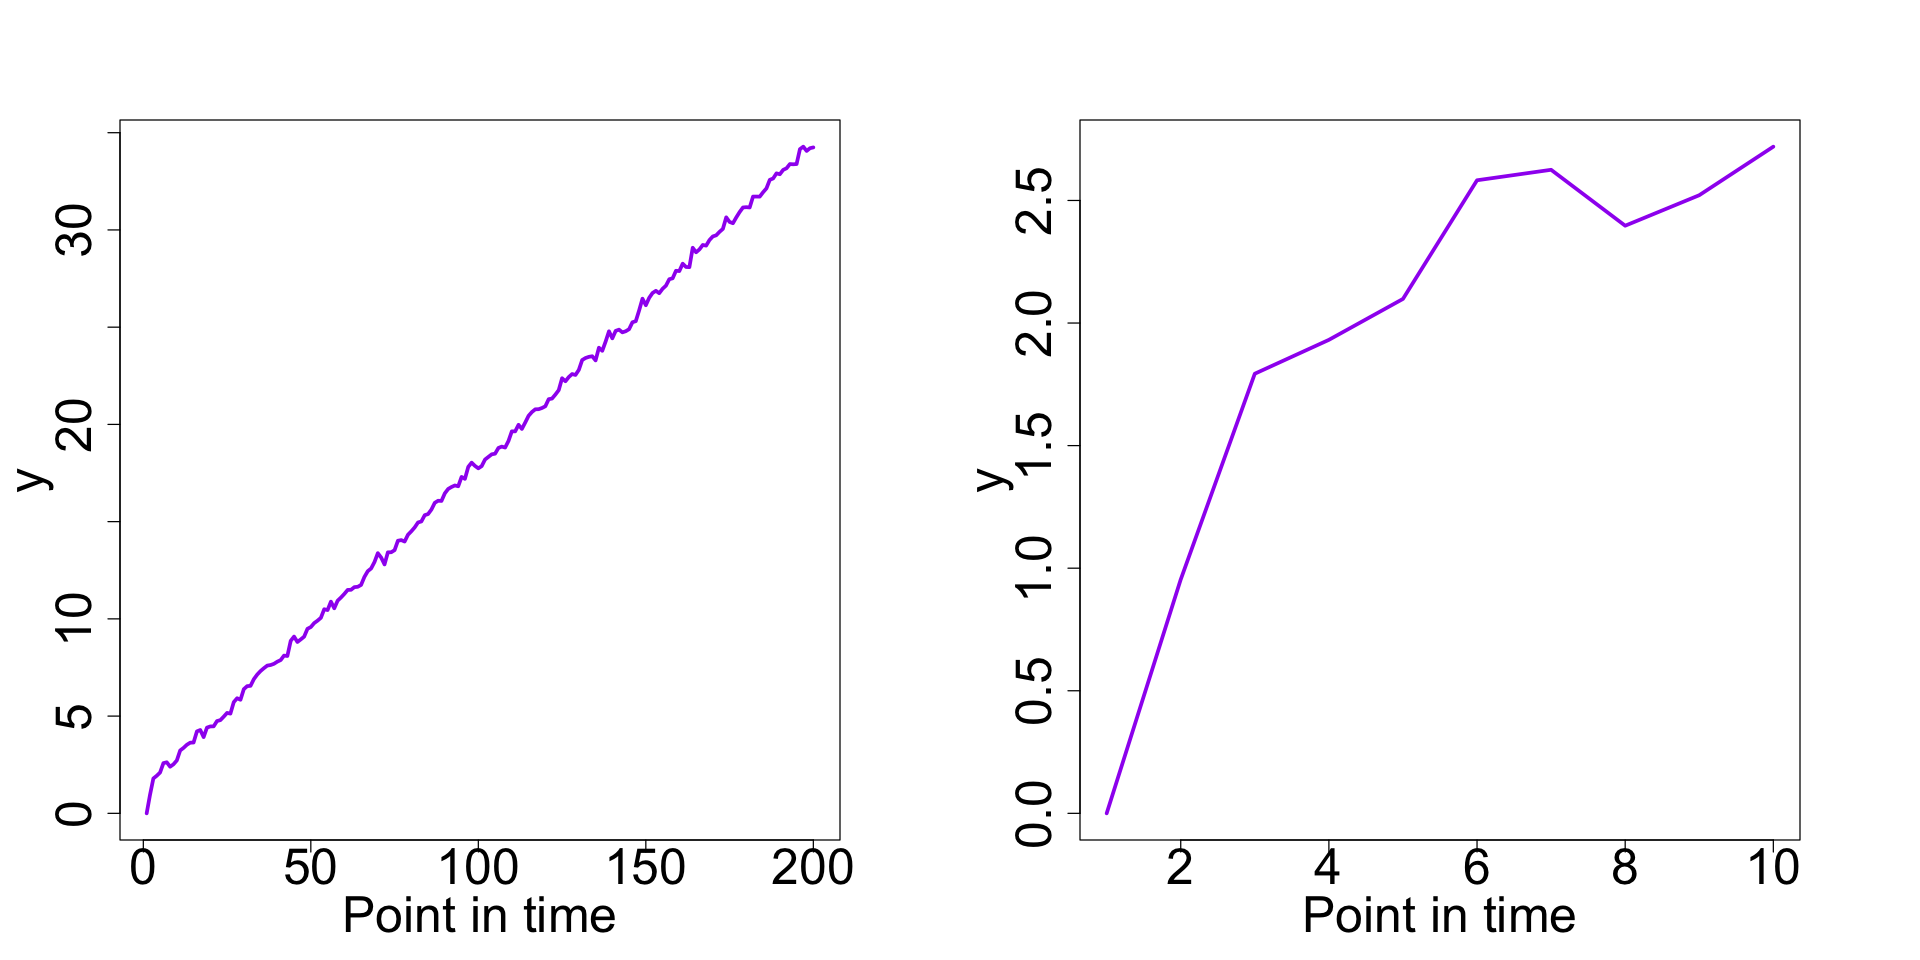

In [5]:
T = 200                     # Set the number of time periods (length of the series)
ex.b = rep(0, T)            # Create an empty vector of length T to store the simulated series
set.seed(123)               # Fix the random seed for reproducibility
e = rnorm(T, 0, 0.2)        # Generate T random errors from N(0, 0.2^2)
beta0 = 0.8                 # Constant term (drift component)
beta1 = 0.4                 # Autoregressive coefficient (effect of past y on current y)
beta2 = 0.1                 # Coefficient on time trend (deterministic component)
t = 1:T                     # Create a time index from 1 to T

# Loop from the 2nd observation onwards
# Each value depends on: 
#  - a constant (beta0)
#  - the lagged value (beta1 * ex.b[i-1]) → autoregressive component
#  - a deterministic time trend (beta2 * t[i])
#  - a random shock (e[i])
for (i in 2:T) {
  ex.b[i] = beta0 + beta1 * ex.b[i-1] + beta2 * t[i] + e[i]
}

# Set plotting options: figure size
options(repr.plot.width=16, repr.plot.height=8)

# Set margins and layout: larger margins, 1 row and 2 plots side by side
par(mar = c(5, 5, 5, 5), mfrow = c(1, 2))

# Plot the entire time series
plot(ex.b, type="l", col="purple", 
     cex.lab=2.5, cex.axis=2.5,
     xlab= "Point in time", ylab = "y", lwd=3)

# Plot only the first 10 observations (zoom in to see short-run behavior)
plot(c(1:10), ex.b[1:10], type="l", col="purple",
     cex.lab=2.5, cex.axis=2.5,
     xlab= "Point in time", ylab = "y", lwd=3)

# Example c)
# Stochastic trend (unit root) and no constant


**Example c:** Random walk without drift

$$\color{blue}{y_t=y_{t-1}+ϵ_t}$$

- $y_t$: the value of the time series at time $t$  
- $y_{t-1}$: the lagged value (yesterday’s $y_t$)  
- $\epsilon_t$: random error term (white noise, mean zero, constant variance)  

**This is a random walk: today’s value equals yesterday’s value plus a random shock.  
It is *non-stationary* because the variance depends on time.**

Expected value of $y_t$:

$$\color{blue}{\mathbb{E}(y_t)=y_0},$$

where $y_0$ is the starting value.

**We see that the expected value is constant over time.**

Variance of $y_t$:

$$\color{blue}{\mathbb{Var}(y_t)=\color{red}{t}\sigma_{ϵ}^2}$$

Hence,

$\color{blue}{\mathbb{Var}(y_1)=\sigma_{ϵ}^2}, \color{blue}{\mathbb{Var}(y_2)=\color{red}{2}\sigma_{ϵ}^2}, \color{blue}{\mathbb{Var}(y_3)=\color{red}{3}\sigma_{ϵ}^2},...$

**We see that the variance is not constant over time.**

<img src="COLOURBOX49899644.jpg" width="200" style="float:left;">



<div style="background-color:lightgrey; padding:10px; border-radius:5px;">
<b>Proof:</b>
    
Random walk without constant can be rewritten as:

$y_t =  y_0 + \sum_{i=1}^tϵ_i,\quad ϵ_t\sim (0, \sigma_{ϵ}^2)$

Then, it follows that:

$\mathbb{E}(y_t)=\mathbb{E}(y_0 + \sum_{i=1}^tϵ_i)=\underbrace{\mathbb{E}(y_0)}_{=y_0}+\mathbb{E}(\sum_{i=1}^tϵ_i)=y_0+ \sum_{i=1}^t\underbrace{\mathbb{E}(ϵ_i)}_{=0}=y_0$

$\mathbb{Var}(y_t)=\mathbb{Var}(y_0 + \sum_{i=1}^tϵ_i)=\underbrace{\mathbb{Var}(y_0)}_{=0}+\mathbb{Var}(\sum_{i=1}^tϵ_i)=\sum_{i=1}^t\underbrace{\mathbb{Var}(ϵ_i)}_{=\sigma_t^2}=t\sigma_2$
    </div>

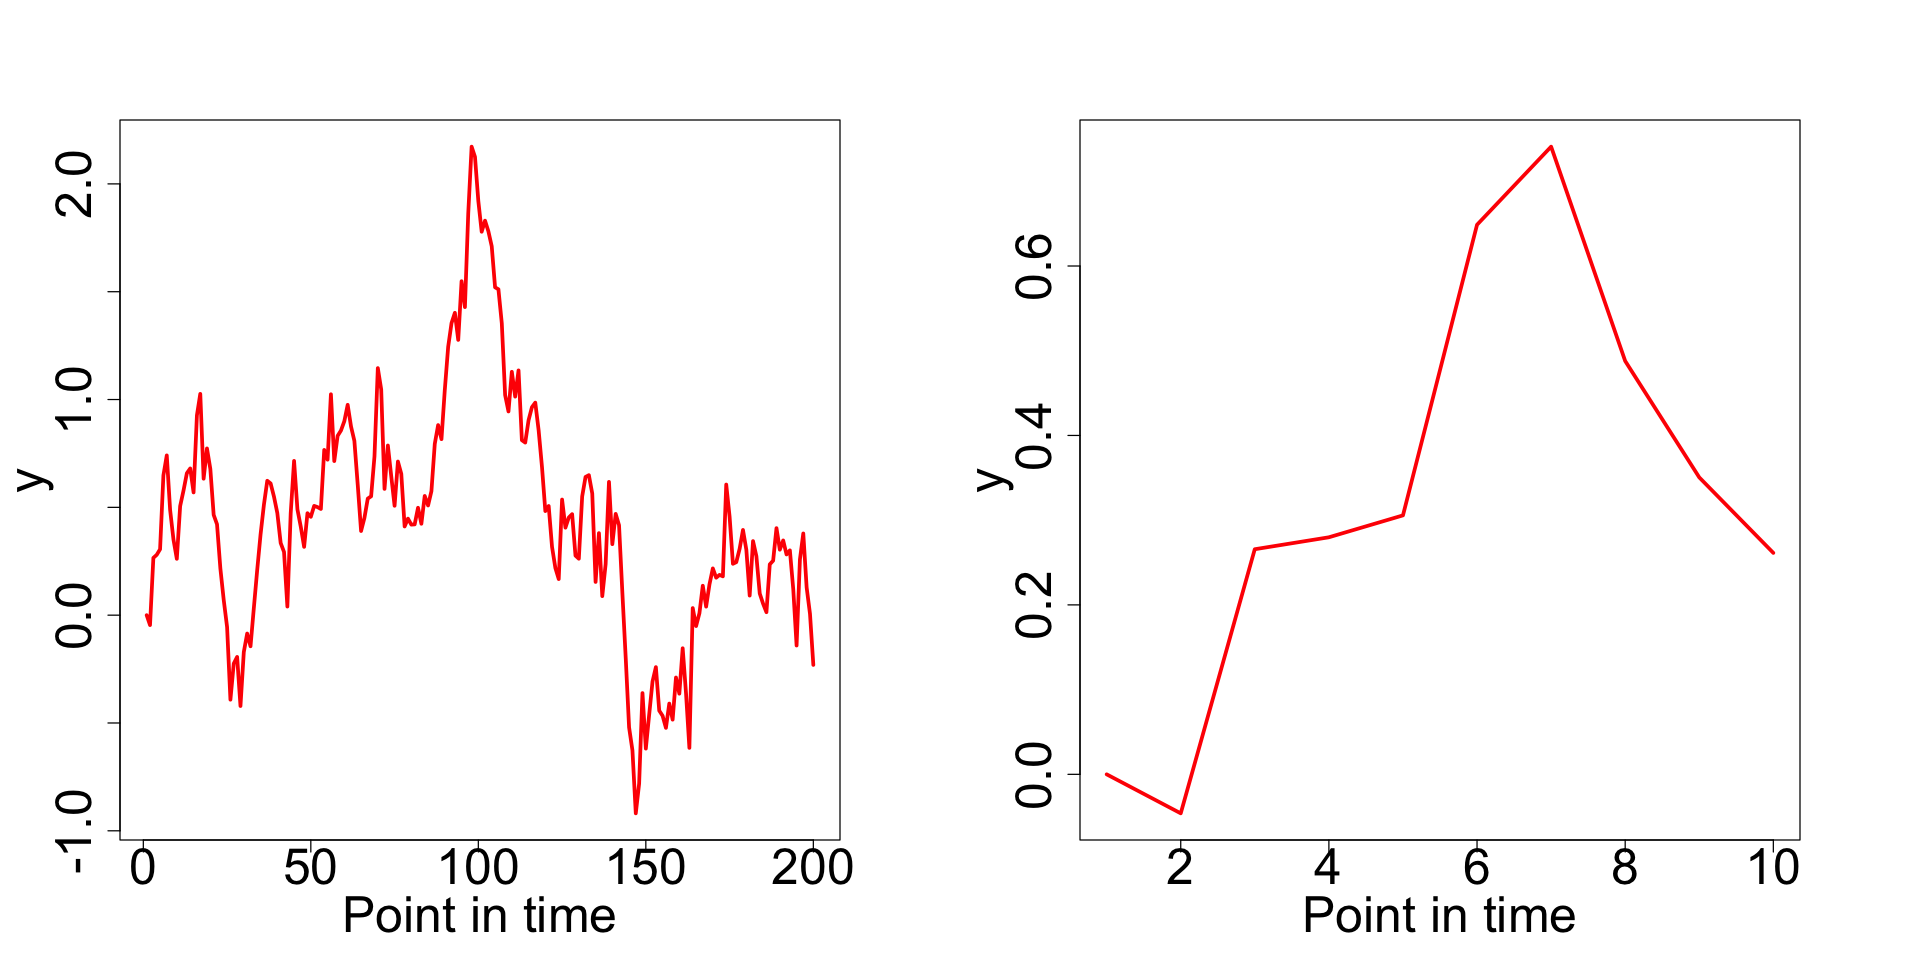

In [6]:
T = 200                     # Set the number of time periods (length of the series)
ex.c = rep(0, T)            # Create an empty vector of length T to store the simulated series
set.seed(123)               # Fix the random seed for reproducibility
e = rnorm(T, 0, 0.2)        # Generate T random errors from N(0, 0.2^2)

# Loop from the 2nd observation onwards
# Each value is yesterday’s value plus a random shock (random walk)
for (t in 2:T) {
  ex.c[t] = ex.c[t-1] + e[t]
}

# Set plotting options: figure size
options(repr.plot.width=16, repr.plot.height=8)

# Set margins and layout: larger margins, 1 row and 2 plots side by side
par(mar = c(5, 5, 5, 5), mfrow = c(1, 2))

# Plot the entire random walk
plot(ex.c, type="l", 
     col="red", cex = 2.5, cex.lab=2.5, cex.axis=2.5, cex.main=2.5, cex.sub=2.5,
     xlab="Point in time", ylab="y", lwd=3)

# Plot only the first 10 observations (zoom in to see short-run fluctuations)
plot(c(1:10), ex.c[1:10], type="l",
     col="red", cex = 2.5, cex.lab=2.5, cex.axis=2.5, cex.main=2.5, cex.sub=2.5,
     xlab= "Point in time", ylab="y", lwd=3)

# Example d)
# Stochastic trend (unit root) and constant

**Example d:** Random walk with drift

$$\color{blue}{y_t=β_0+y_{t-1}+ϵ_t}$$

- $y_t$: the value of the time series at time $t$  
- $y_{t-1}$: the lagged value (yesterday’s $y_t$)  
- $\beta_0$: intercept, drift (it adds a constant expected change each period, regardless of $t$) 
- $\epsilon_t$: random error term

**This is a random walk with drift: each step is yesterday’s value plus a constant shift and a random shock.  
It is non-stationary because both the mean and variance depend on time.**



Expected value of $y_t$:

$$\color{blue}{\mathbb{E}(y_t)=y_0+\color{red}{t}\beta_0}$$


Hence,

$\color{blue}{\mathbb{E}(y_1)=y_0+\beta_0},\quad \color{blue}{\mathbb{E}(y_2)=y_0+\color{red}{2}\beta_0},\quad \color{blue}{\mathbb{E}(y_3)=y_0+\color{red}{3}\beta_0},...$

**We see that the expected value is not constant over time.**

Variance of $y_t$:

$$\color{blue}{\mathbb{Var}(y_t)=\color{red}{t}\sigma_{ϵ}^2}$$

Hence,

$\color{blue}{\mathbb{Var}(y_1)=\sigma_{ϵ}^2}, \color{blue}{\mathbb{Var}(y_2)=\color{red}{2}\sigma_{ϵ}^2}, \color{blue}{\mathbb{Var}(y_3)=\color{red}{3}\sigma_{ϵ}^2},...$

**We see that the variance is not constant over time.**

<img src="COLOURBOX49899644.jpg" width="200" style="float:left;">



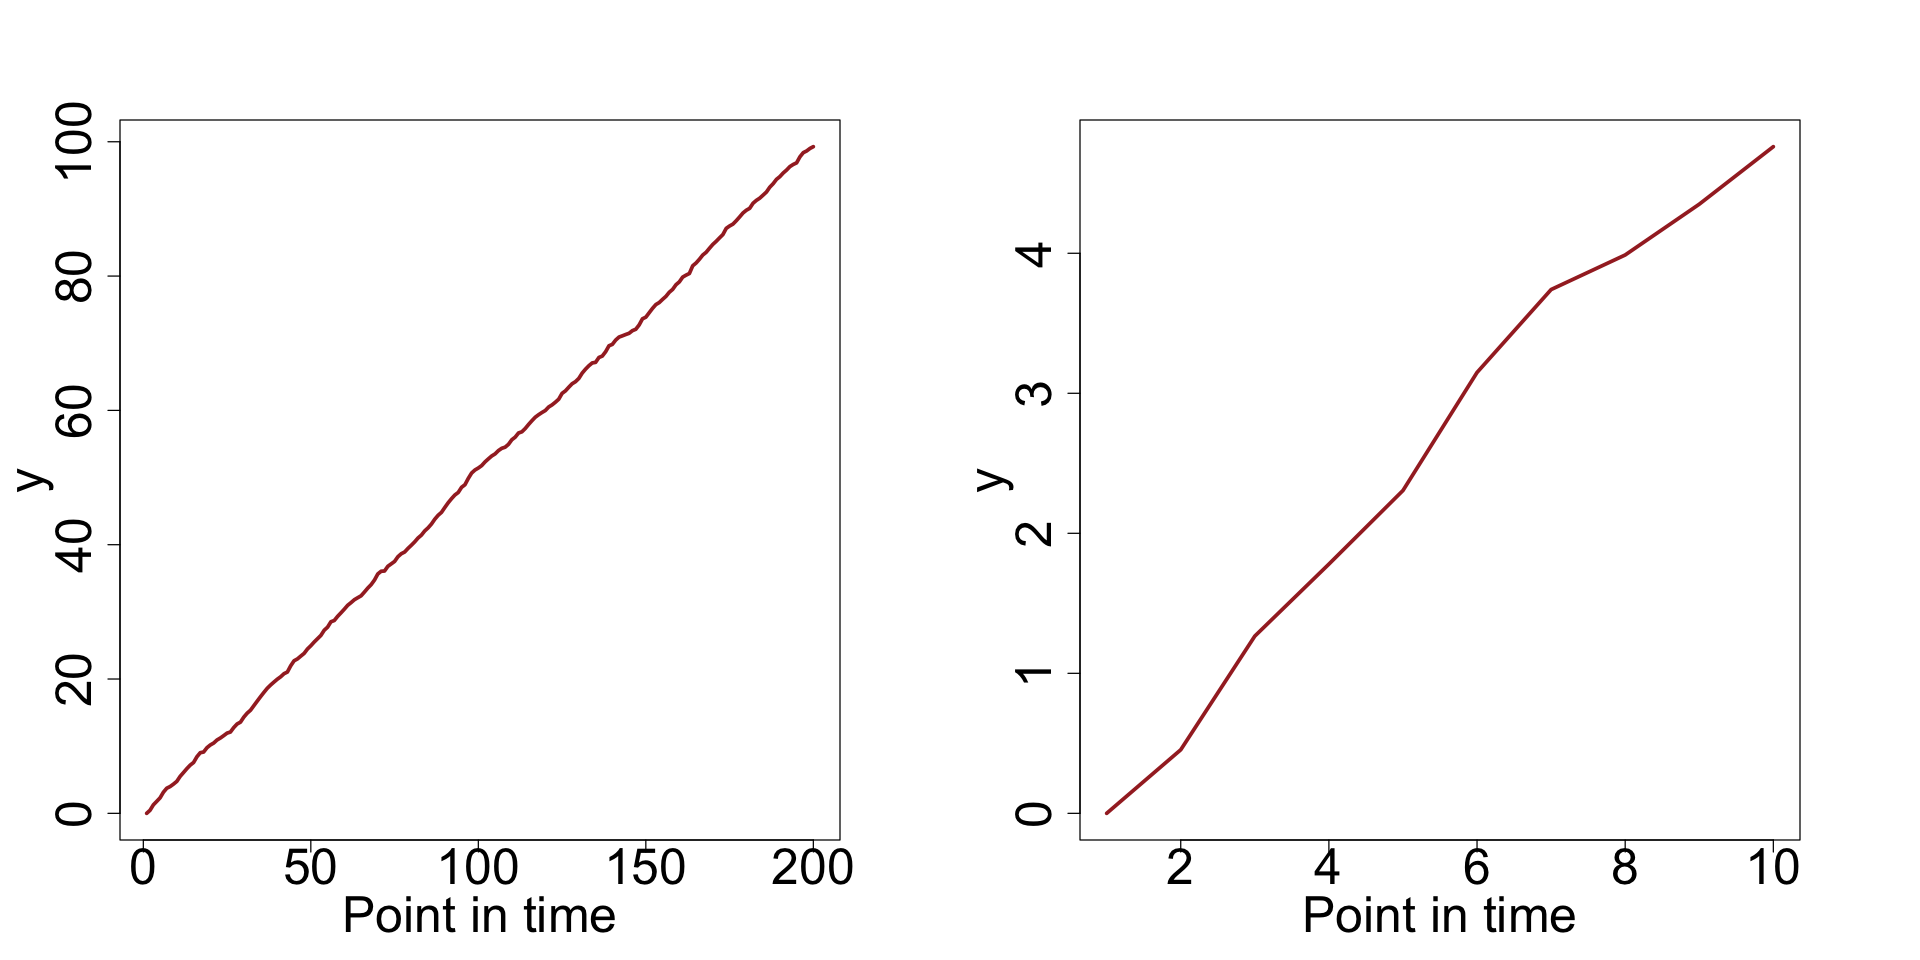

In [7]:
T = 200                     # Set the number of time periods (length of the series)
ex.d = rep(0, T)            # Create an empty vector of length T to store the simulated series
beta0 = 0.5                 # Constant term (drift) that shifts the process upward over time
set.seed(123)               # Fix the random seed for reproducibility
e = rnorm(T, 0, 0.2)        # Generate T random errors from N(0, 0.2^2)

# Loop from the 2nd observation onwards
# Each value equals yesterday’s value + a constant drift + a random shock
for (t in 2:T) {
  ex.d[t] = beta0 + ex.d[t-1] + e[t]
}

# Set plotting options: figure size
options(repr.plot.width=16, repr.plot.height=8)

# Set margins and layout: larger margins, 1 row and 2 plots side by side
par(mar = c(5, 5, 5, 5), mfrow = c(1, 2))

# Plot the entire random walk with drift
plot(ex.d, type="l", 
     col="brown", cex = 2.5, cex.lab=2.5, cex.axis=2.5, cex.main=2.5, cex.sub=2.5,
     xlab="Point in time", ylab="y", lwd=3)

# Plot only the first 10 observations (zoom in to see short-run fluctuations)
plot(c(1:10), ex.d[1:10], type="l",
     col="brown", cex = 2.5, cex.lab=2.5, cex.axis=2.5, cex.main=2.5, cex.sub=2.5,
     xlab="Point in time", ylab="y", lwd=3)



<div style="background-color:lightgrey; padding:10px; border-radius:5px;"> 
    
<b>Proof:</b>
    
    
Random walk with constant can be rewritten as:

$y_t =  y_0+ t\beta_0 + \sum_{i=1}^tϵ_i,\quad ϵ_t\sim (0, \sigma_{ϵ}^2)$

Then, it follows that:
\begin{align*}
\mathbb{E}(y_t)&=\mathbb{E}(y_0+t\beta_0 + \sum_{i=1}^tϵ_i)=\underbrace{\mathbb{E}(y_0+t\beta_0)}_{=y_0+t\beta_0}+\mathbb{E}(\sum_{i=1}^tϵ_i)\\
    &=y_0+t\beta_0+ \sum_{i=1}^t\underbrace{\mathbb{E}(ϵ_i)}_{=0}=y_0+t\beta_0
    \end{align*}
\begin{align*}
\mathbb{Var}(y_t)&=\mathbb{Var}(y_0+t\beta_0 + \sum_{i=1}^tϵ_i)=\underbrace{\mathbb{Var}(y_0+t\beta_0)}_{=0}+\mathbb{Var}(\sum_{i=1}^tϵ_i)\\&=\sum_{i=1}^t\underbrace{\mathbb{Var}(ϵ_i)}_{=\sigma_t^2}=t\sigma_2
\end{align*}
</div>

# Example e)
# Stochastic trend (unit root), deterministic trend, and constant

**Example e:** Random walk with drift and deterministic trend
$$\color{blue}{y_t=β_0+y_{t-1}+\beta_1t+ϵ_t}$$

- $y_t$: the value of the time series at time $t$  
- $y_{t-1}$: the lagged value (yesterday’s $y_t$)  
- $\beta_0$: intercept, drift (it adds a constant expected change each period, regardless of $t$) 
- $\beta_1$: slope on deterministic trend (time-driven component)  
- $\epsilon_t$: random error term

**This is a random walk with drift and deterministic trend: each step is yesterday’s value plus a constant shift, a time-dependent trend, and a random shock. It is non-stationary because both the mean and variance depend on time.**

Expected value of $y_t$:

$$\color{blue}{\mathbb{E}(y_t)=y_0+\color{red}{t}\beta_0+\beta_1\frac{\color{red}{t(t+1)}}{2}}$$


Hence,

$\color{blue}{\mathbb{E}(y_1)=y_0+\beta_0+\beta_1},\quad \color{blue}{\mathbb{E}(y_2)=y_0+\color{red}{2}\beta_0+\color{red}{6}\beta_1},\quad \color{blue}{\mathbb{E}(y_3)=y_0+\color{red}{3}\beta_0+\color{red}{12}\beta_1},...$

**We see that the expected value is not constant over time.**


Variance of $y_t$:

$$\color{blue}{\mathbb{Var}(y_t)=\color{red}{t}\sigma_{ϵ}^2}$$

Hence,

$\color{blue}{\mathbb{Var}(y_1)=\sigma_{ϵ}^2}, \color{blue}{\mathbb{Var}(y_2)=\color{red}{2}\sigma_{ϵ}^2}, \color{blue}{\mathbb{Var}(y_3)=\color{red}{3}\sigma_{ϵ}^2},...$

**We see that the variance is not constant over time.**


<img src="COLOURBOX49899644.jpg" width="200" style="float:left;">


<div style="background-color:lightgrey; padding:10px; border-radius:5px;">

<b>Proof:</b>
    
    
Random walk with constant can be rewritten as:

$y_t =  y_0+ t\beta_0 + \beta_1\frac{t(1+t)}{2}+ \sum_{i=1}^tϵ_i,\quad ϵ_t\sim (0, \sigma_{ϵ}^2)$

Then, it follows that:
\begin{align*}
\mathbb{E}(y_t)&=\mathbb{E}(y_0+t\beta_0 + \beta_1\frac{t(1+t)}{2}+ \sum_{i=1}^tϵ_i)
    =\underbrace{\mathbb{E}(y_0+t\beta_0)+ \beta_1\frac{t(1+t)}{2}}_{=y_0+t\beta_0+ \beta_1\frac{t(1+t)}{2}})+\mathbb{E}(\sum_{i=1}^tϵ_i)\\
    &=y_0+t\beta_0+ \beta_1\frac{t(1+t)}{2}+ \sum_{i=1}^t\underbrace{\mathbb{E}(ϵ_i)}_{=0}
    =y_0+t\beta_0+ \beta_1\frac{t(1+t)}{2}
\end{align*}
    
\begin{align*}
\mathbb{Var}(y_t)&=\mathbb{Var}(y_0+t\beta_0 + \beta_1\frac{t(1+t)}{2}+ \sum_{i=1}^tϵ_i)\\
    &=\underbrace{\mathbb{Var}(y_0+t\beta_0+ \beta_1\frac{t(1+t)}{2})}_{=0}+\mathbb{Var}(\sum_{i=1}^tϵ_i)=\sum_{i=1}^t\underbrace{\mathbb{Var}(ϵ_i)}_{=\sigma_t^2}=t\sigma_2
\end{align*}
 
</div>

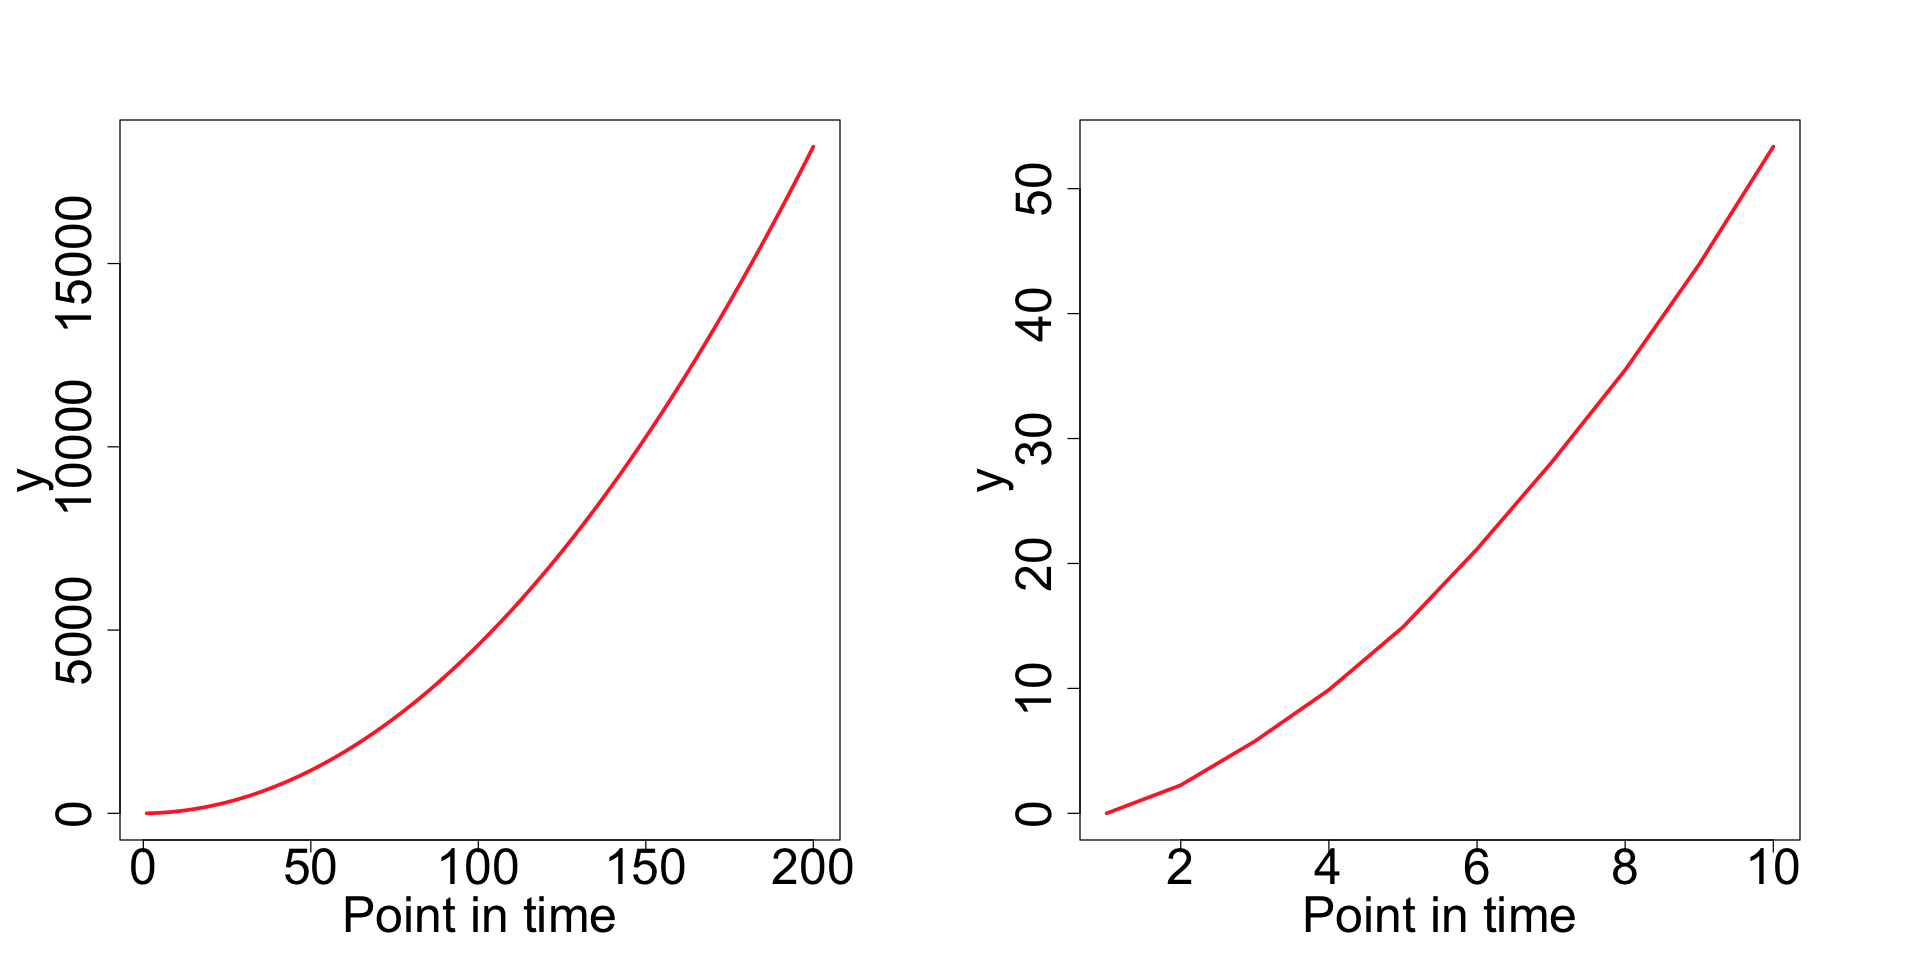

In [8]:
T = 200                        # Set the number of time periods (length of the series)
ex.e = rep(0, T)               # Create an empty vector of length T to store the simulated series
beta0 = 0.5                    # Constant drift term (shifts the process upward each step)
beta1 = 0.9                    # Coefficient on deterministic trend (linear trend over time)
set.seed(123)                  # Fix the random seed for reproducibility
e = rnorm(T, 0, 0.2)           # Generate T random errors from N(0, 0.2^2)
t = 1:T                        # Define time index from 1 to T

# Loop from the 2nd observation onwards
# Each value = yesterday’s value + constant drift + time trend + random shock
for (t in 2:T) {
  ex.e[t] = beta0 + beta1 * t + ex.e[t-1] + e[t]
}

# Set plotting options: figure size
options(repr.plot.width=16, repr.plot.height=8)

# Set margins and layout: larger margins, 1 row and 2 plots side by side
par(mar = c(5, 5, 5, 5), mfrow = c(1, 2))

# Plot the entire random walk with drift and trend
plot(ex.e, type="l", 
     col="firebrick1", cex = 2.5, cex.lab=2.5, cex.axis=2.5, cex.main=2.5, cex.sub=2.5,
     xlab="Point in time", ylab="y", lwd=3)

# Plot only the first 10 observations (zoom in to see short-run fluctuations)
plot(c(1:10), ex.e[1:10], type="l",
     col="firebrick1", cex = 2.5, cex.lab=2.5, cex.axis=2.5, cex.main=2.5, cex.sub=2.5,
     xlab="Point in time", ylab="y", lwd=3)

<img src="COLOURBOX33413532.jpg" width="200">

# Monte-Carlo simulations 
# Comparison of processes with stochastic and deterministic trends

**Example b**: $y_t$ as a function of time $t$ and $y_{t-1}$ (i.e., yesterday's value of $y_t$)

 $$\color{blue}{y_t = \beta_0 + \beta_1y_{t-1} + \beta_2t+ϵ_t, \quad |\beta_1| < 1}$$

**Example d**: Random walk with constant

$$\color{blue}{y_t=β_0+y_{t-1}+ϵ_t}$$

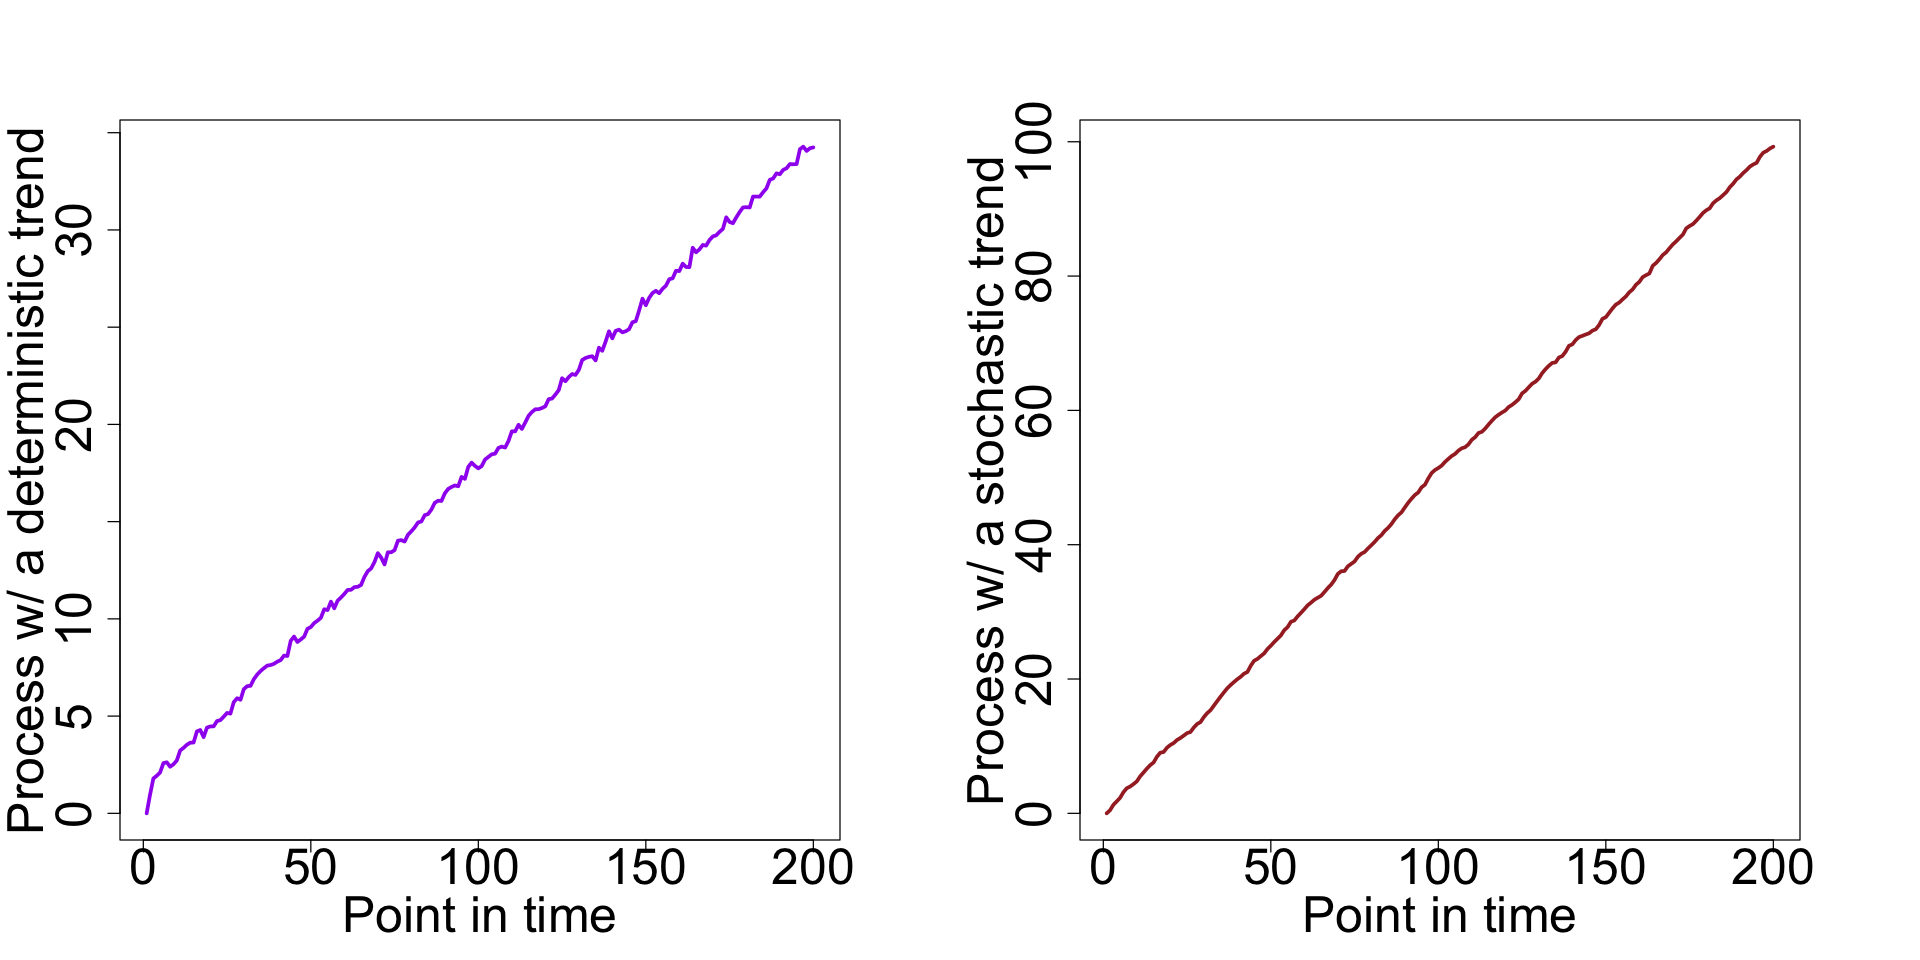

In [9]:
# Set plotting options: figure size for the output
options(repr.plot.width=16, repr.plot.height=8)

# Set margins and layout
# mar = margin sizes (bottom, left, top, right)
# mfrow = number of plots (1 row, 2 columns → two plots side by side)
par(mar = c(5, 5, 5, 5), mfrow = c(1, 2))

# ------------------------
# Plot process with a deterministic trend (Example b)
# ------------------------
plot(ex.b, type="l",                 # Plot as a line ("l")
     col="purple",                   # Line color = purple
     lwd=3,                          # Line width = 3
     cex.lab=2.5, cex.axis=2.5,      # Scale up axis labels and tick labels
     xlab="Point in time",           # X-axis label
     ylab="Process w/ a deterministic trend")   # Y-axis label

# ------------------------
# Plot process with a stochastic trend (Example d)
# ------------------------
plot(ex.d, type="l",                 # Plot as a line ("l")
     col="brown",                    # Line color = brown
     lwd=3,                          # Line width = 3
     cex.lab=2.5, cex.axis=2.5,      # Scale up axis labels and tick labels
     xlab="Point in time",           # X-axis label
     ylab="Process w/ a stochastic trend")  # Y-axis label

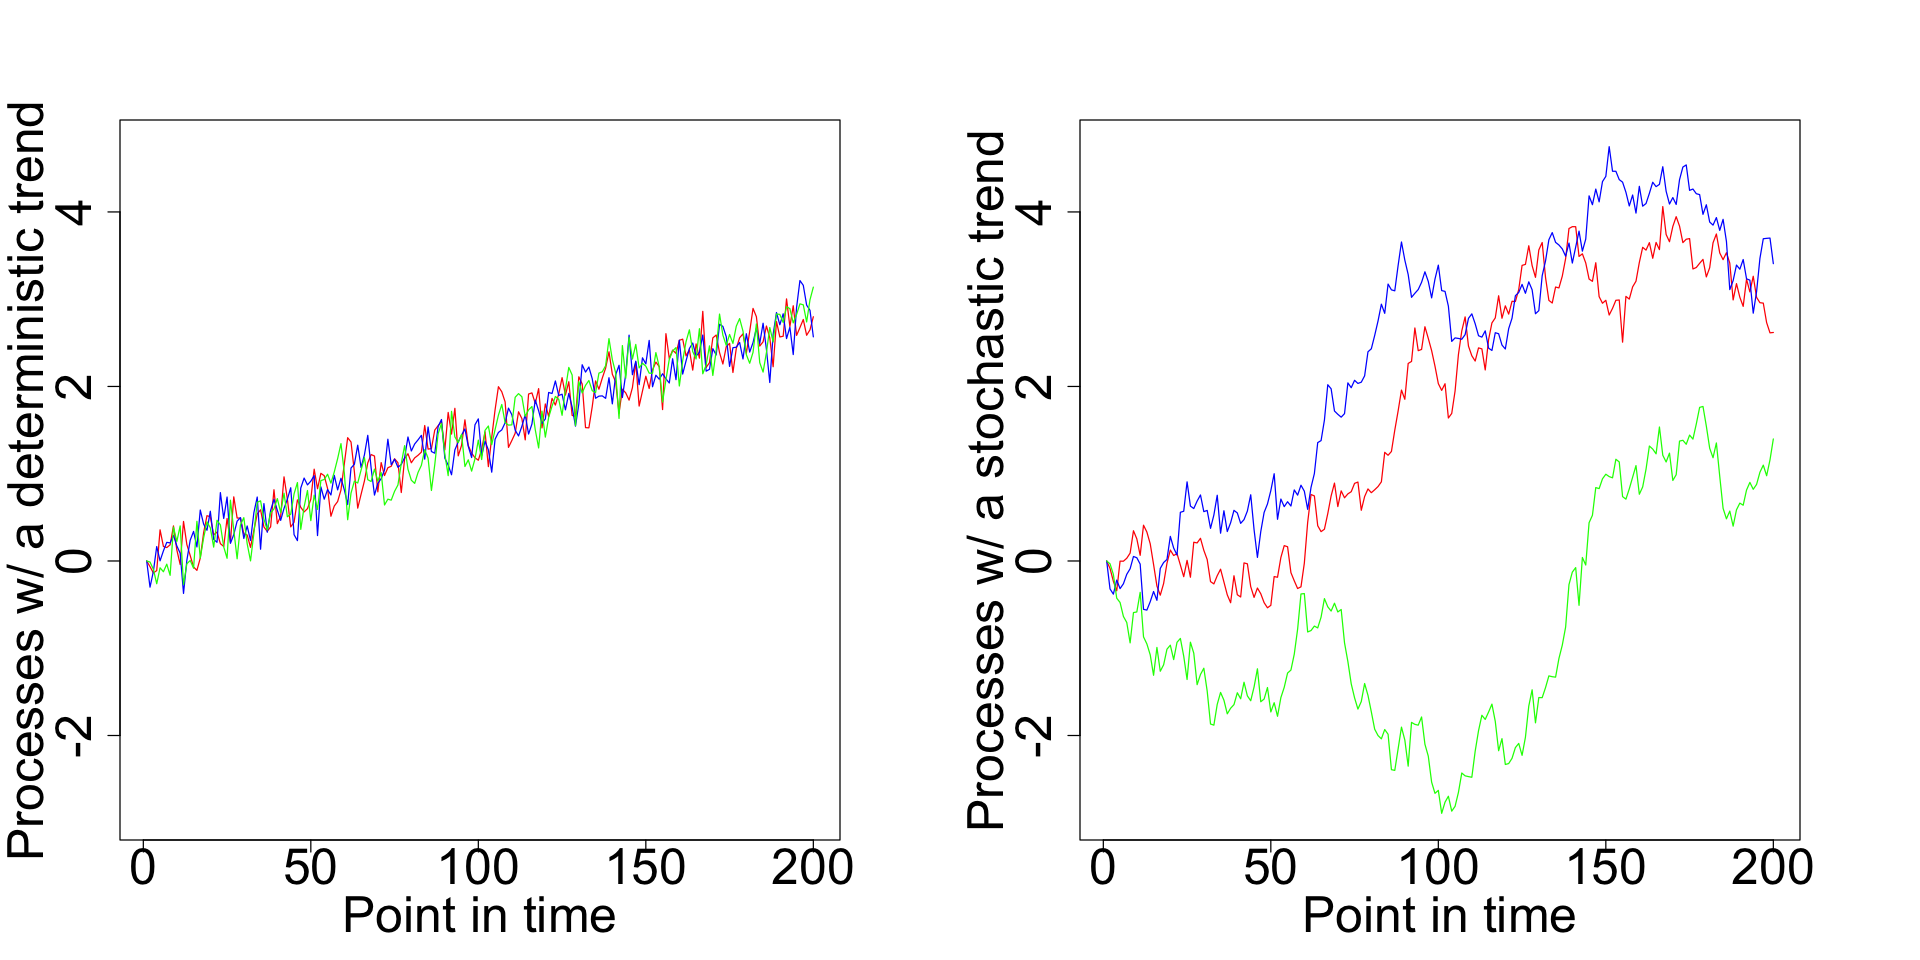

In [10]:
T = 200                        # Number of time periods

# Initialize empty vectors for three deterministic-trend processes
d1 = rep(0, T)
d2 = rep(0, T)
d3 = rep(0, T)

# Initialize empty vectors for three stochastic-trend processes
s1 = rep(0, T)
s2 = rep(0, T)
s3 = rep(0, T)

# Parameters
beta0 = 0.01                   # Constant drift term
beta1 = 0.3                    # Autoregressive coefficient (used in deterministic trend processes)
beta2 = 0.01                   # Deterministic time trend slope

# Random error terms for each process (different shocks for each)
e1 = rnorm(T, 0, 0.2)
e2 = rnorm(T, 0, 0.2)
e3 = rnorm(T, 0, 0.2)

t = 1:T                        # Time index

# Loop to generate the processes
for (i in 2:T) {
  # Deterministic trend processes: AR(1) with drift + time trend + noise
  d1[i] = beta0 + beta1 * d1[i-1] + beta2 * t[i] + e1[i]
  d2[i] = beta0 + beta1 * d2[i-1] + beta2 * t[i] + e2[i]
  d3[i] = beta0 + beta1 * d3[i-1] + beta2 * t[i] + e3[i]

  # Stochastic trend processes: random walk with drift + noise
  s1[i] = beta0 + s1[i-1] + e1[i]
  s2[i] = beta0 + s2[i-1] + e2[i]
  s3[i] = beta0 + s3[i-1] + e3[i]
}

# Set plotting options: figure size
options(repr.plot.width=16, repr.plot.height=8)

# Set margins and layout: 1 row, 2 plots side by side
par(mar = c(5, 5, 5, 5), mfrow = c(1, 2))

# Find min and max across all series to set same y-axis scale
minv = min(d1, d2, d3, s1, s2, s3)
maxv = max(d1, d2, d3, s1, s2, s3)

# ------------------------
# Plot deterministic trend processes
# ------------------------
plot(d1, type="l", col="red", lwd=1,
     cex = 2.5, cex.lab=2.5, cex.axis=2.5, cex.main=2.5, cex.sub=2.5,
     xlab= "Point in time", 
     ylab="Processes w/ a deterministic trend", 
     ylim=c(minv, maxv))   # Use consistent y-axis
lines(d2, col="blue", lwd=1)   # Add second deterministic trend process
lines(d3, col="green", lwd=1)  # Add third deterministic trend process

# ------------------------
# Plot stochastic trend processes
# ------------------------
plot(s1, type="l", col="red", lwd=1,
     cex = 2.5, cex.lab=2.5, cex.axis=2.5, cex.main=2.5, cex.sub=2.5,
     xlab= "Point in time", 
     ylab="Processes w/ a stochastic trend", 
     ylim=c(minv, maxv))       # Use consistent y-axis
lines(s2, col="blue", lwd=1)   # Add second stochastic trend process
lines(s3, col="green", lwd=1)  # Add third stochastic trend process


<img src="COLOURBOX33413532.jpg" width="200">

# Remedy for non-stationarity caused by deterministic trend


**Solution:** Detrending

Run a regression of the data on the deterministic trend (e.g., a constant plus time index) to estimate the trend and remove it from the data.

<div style="background-color:lightgrey; padding:10px; border-radius:5px;">


<b>Proof Example a):</b>

\begin{align*} 
\tilde y_t \equiv y_t-\hat{y}&= \beta_0 + \beta_1t+ϵ_t - \left(\hat{\beta}_0+\hat{\beta_1}t \right)\\
    &=\beta_0-\hat{\beta}_0 +t(\beta_1-\hat{\beta}_1)+\epsilon_t
\end{align*}    
    
Under standard OLS assumptions,

$$
\hat\beta \xrightarrow{p} \beta,
$$

so

$$
(\hat\beta_0-\beta_0)+(\hat\beta_1-\beta_1)t \xrightarrow{p} 0
\quad \text{for each fixed } t.
$$

Thus

$$
\tilde y_t \xrightarrow{p} \epsilon_t,
$$

and the detrended series converges to the stationary noise.

**Detrending using estimated coefficients yields residuals that, in large samples, behave like the stationary error process $
\epsilon_t.
$**

<div style="background-color:lightgrey; padding:10px; border-radius:5px;">


<b>Proof Example b):</b>

\begin{align*}    
\tilde y_t \equiv y_t-\hat{y}&= \beta_0 + \beta_1t+\beta_2y_{t-1}+ϵ_t - \left(\hat{\beta}_0+\hat{\beta_1}t +\hat{\beta_2}y_{t-1} \right)\\&=\beta_0-\hat{\beta}_0 +t(\beta_1-\hat{\beta}_1)+y_{t-1}(\beta_2-\hat{\beta}_2)+\epsilon_t, \quad |\beta_2|<1
\end{align*}
Under standard OLS assumptions,

$$
\hat\beta \xrightarrow{p} \beta,
$$

so

$$
(\hat\beta_0-\beta_0)+(\hat\beta_1-\beta_1)t +(\beta_2-\hat{\beta}_2)y_{t-1} \xrightarrow{p} 0
\quad \text{for each fixed } t.
$$

Thus

$$
\tilde y_t \xrightarrow{p} \epsilon_t,
$$

and the detrended series converges to the stationary noise.

**Detrending using estimated coefficients yields residuals that, in large samples, behave like the stationary error process $
\epsilon_t.
$**

In [11]:
# Detrend using R’s built-in detrending.
library(pracma)
ex.a.detrend = detrend(ex.a, 'linear')

**Alternatively:**

1.   Regress $y_t$ on time:
$$y_t=\alpha_0 + \alpha_1 t + u_t$$
2.  Store estimated coefficients:
$$\{\tilde{\alpha}_0, \tilde{\alpha}_1 \}$$
3. Compute predicated values of $y_t$:
$$\tilde{y}_t= \tilde{\alpha}_0 + \tilde{\alpha}_1t$$
4. Compute model residulas:
$$ \tilde{u}_t = y_t-\tilde{y}_t$$

The estimated model residuals are detrended values of $y_t$.

In [12]:
# Detrend manually
# Fit a linear regression of ex.a on time t
model = lm(ex.a ~ t)               

# Extract estimated coefficients (intercept and slope)
coef = model$coefficients          

# Manually detrend: subtract fitted intercept and slope*t from the series
ex.a.lm = ex.a - coef[1] - t * coef[2]  
# Compare the first few values of the two approaches (should be identical)
data.frame(head(ex.a.detrend), head(ex.a.lm))

head.ex.a.detrend.,head.ex.a.lm.
<dbl>,<dbl>
-0.1257143849,-0.1257143849
-0.0595006495,-0.0595006495
0.2984306152,0.2984306152
0.0009447346,0.0009447346
0.0128547073,0.0128547073
0.3301642616,0.3301642616


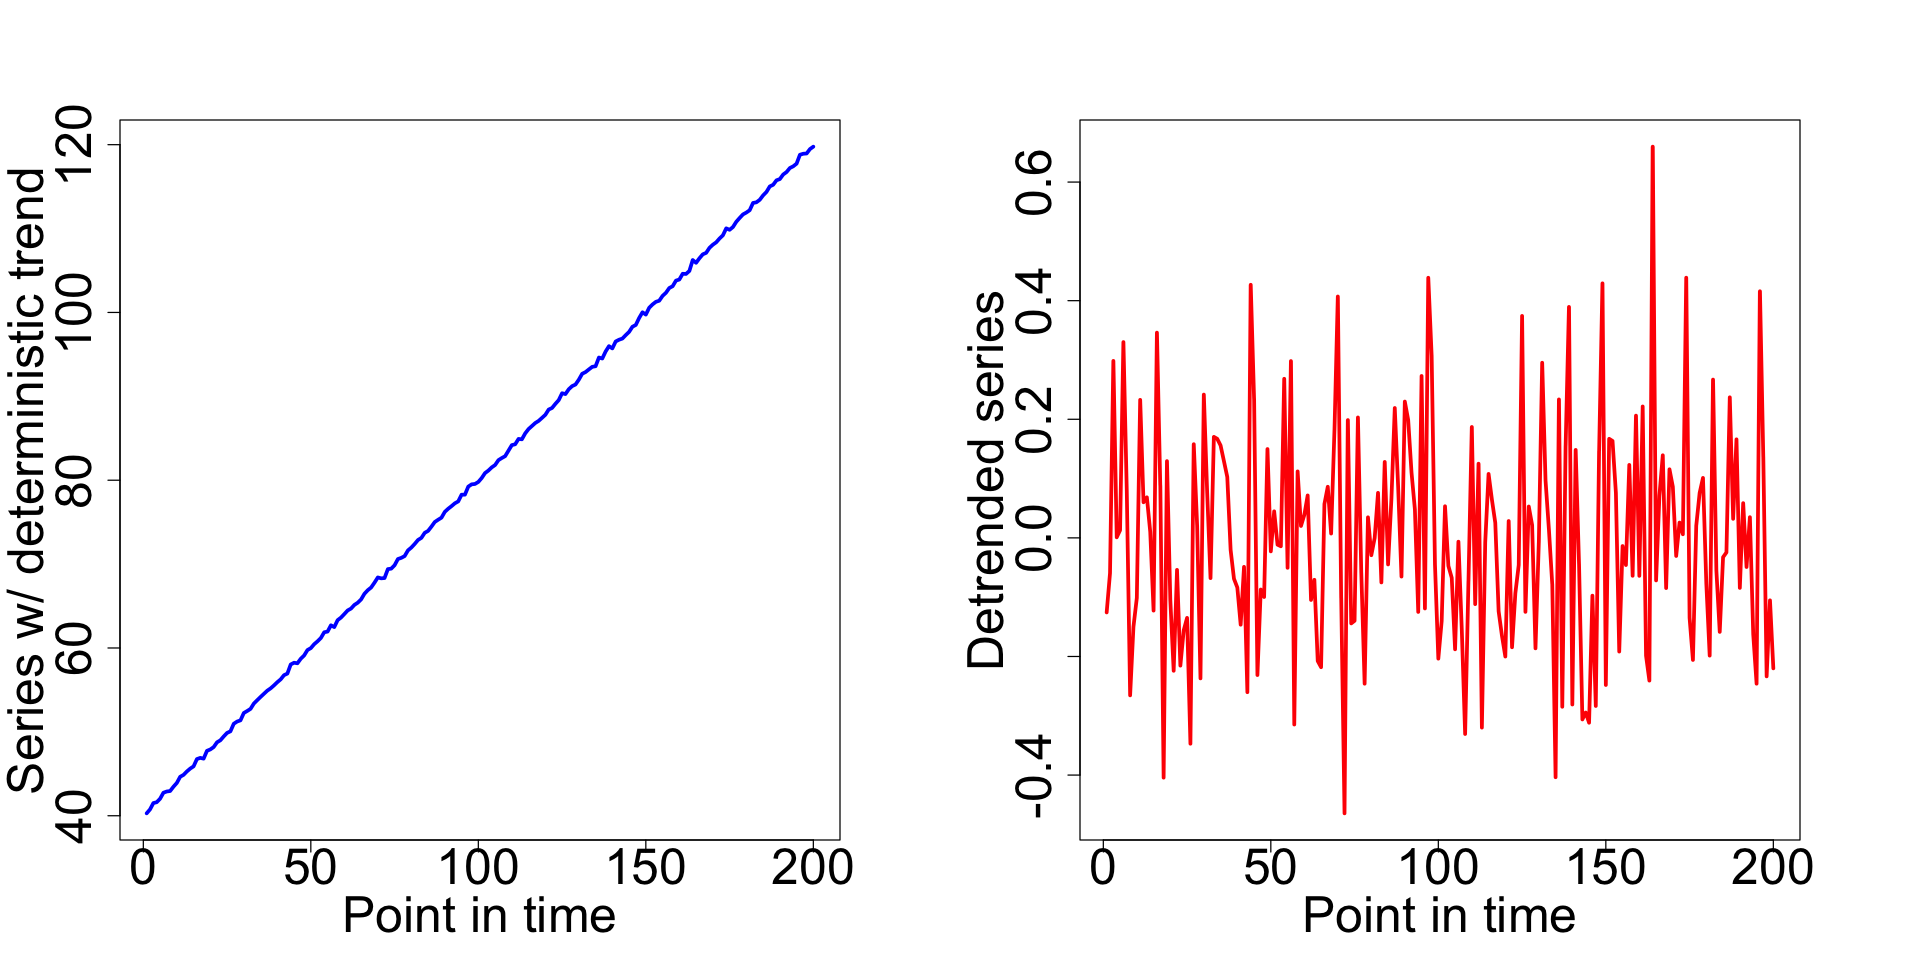

In [13]:
# Set plotting options: figure size for output
options(repr.plot.width=16, repr.plot.height=8)

# Set margins and layout:
# mar = margins (bottom, left, top, right)
# mfrow = number of plots (1 row, 2 columns → two plots side by side)
par(mar = c(5, 5, 5, 5), mfrow = c(1,2))

# ------------------------
# Plot the original series (with deterministic trend)
# ------------------------
plot(ex.a, type="l", col="blue", lwd=3,
     cex = 2.5, cex.lab=2.5, cex.axis=2.5,  # Scale labels and axes
     cex.main=2.5, cex.sub=2.5,             # Scale title/subtitle
     xlab= "Point in time",                 # X-axis label
     ylab="Series w/ deterministic trend")  # Y-axis label

# ------------------------
# Plot the detrended series (residuals after removing linear trend)
# ------------------------
plot(ex.a.detrend, type="l", col="red", lwd=3,
     cex = 2.5, cex.lab=2.5, cex.axis=2.5,
     cex.main=2.5, cex.sub=2.5,
     xlab= "Point in time",
     ylab="Detrended series")


# Remedy for non-stationarity caused by stochastic trend


**Solution:** Differentiating

Transform the series into the differences between every two consecutive observations

$$\color{blue}{Δ y_t = y_t - y_{t-1}} $$


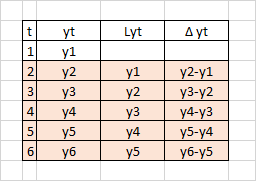

<img src="COLOURBOX49899644.jpg" width="200" style="float:left;">



<div style="background-color:lightgrey; padding:10px; border-radius:5px;">


<b>Proof Example c):</b>

Random walk without constant can be rewritten as:

$y_t =  y_0 + \sum_{i=1}^tϵ_i,\quad ϵ_t\sim (0, \sigma_{ϵ}^2)$

The first difference is defined as:
$\Delta y_t = y_t - y_{t-1}=y_0+ \sum_{i=1}^tϵ_i -\left(y_0+ \sum_{i=1}^{t-1}ϵ_i\right)=\epsilon_t$

$\mathbb{E}(\Delta y_t)=\mathbb{E}(\epsilon_t)=0$

$\mathbb{Var}(\Delta y_t)=\mathbb{Var}(\epsilon_t)=\sigma^2_{\epsilon}$
    
We see that the differenced series has constant mean and variance.
    
</div>

<div style="background-color:lightgrey; padding:10px; border-radius:5px;">


<b>Proof Example d):</b>

Random walk with constant can be rewritten as:

$y_t =  y_0+ t\beta_0 + \sum_{i=1}^tϵ_i,\quad ϵ_t\sim (0, \sigma_{ϵ}^2)$

Then, it follows that:
$\Delta y_t = y_t - y_{t-1}=y_0+ t\beta_0+\sum_{i=1}^tϵ_i -\left(y_0+ (t-1)\beta_0+\sum_{i=1}^{t-1}ϵ_i\right)=\beta+\epsilon_t$

$\mathbb{E}(\Delta y_t)=\mathbb{E}(\beta+\epsilon_t)=\beta$

$\mathbb{Var}(\Delta y_t)=\mathbb{Var}(\beta+\epsilon_t)=\sigma^2_{\epsilon}$

We see that the differenced series has constant mean and variance.    
    
</div>

In [14]:
# Take first differences using R’s built-in differencing
ex.c.diff = diff(ex.c)       

In [15]:
# Compute the differences manually
T = length(ex.c)  # Length of the original series            

c1 = ex.c[1:T-1]           # Create a vector of the first T-1 observations (lagged values)
c2 = ex.c[2:T]             # Create a vector of the last T-1 observations (current values)               

ex.c.alt = c2 - c1         # Manually compute differences: y_t - y_{t-1}    

# Compare the first few values of the two approaches (should be identical)
data.frame(head(ex.c.diff), head(ex.c.alt))

head.ex.c.diff.,head.ex.c.alt.
<dbl>,<dbl>
-0.04603550,-0.04603550
0.31174166,0.31174166
0.01410168,0.01410168
0.02585755,0.02585755
0.34301300,0.34301300
0.09218324,0.09218324


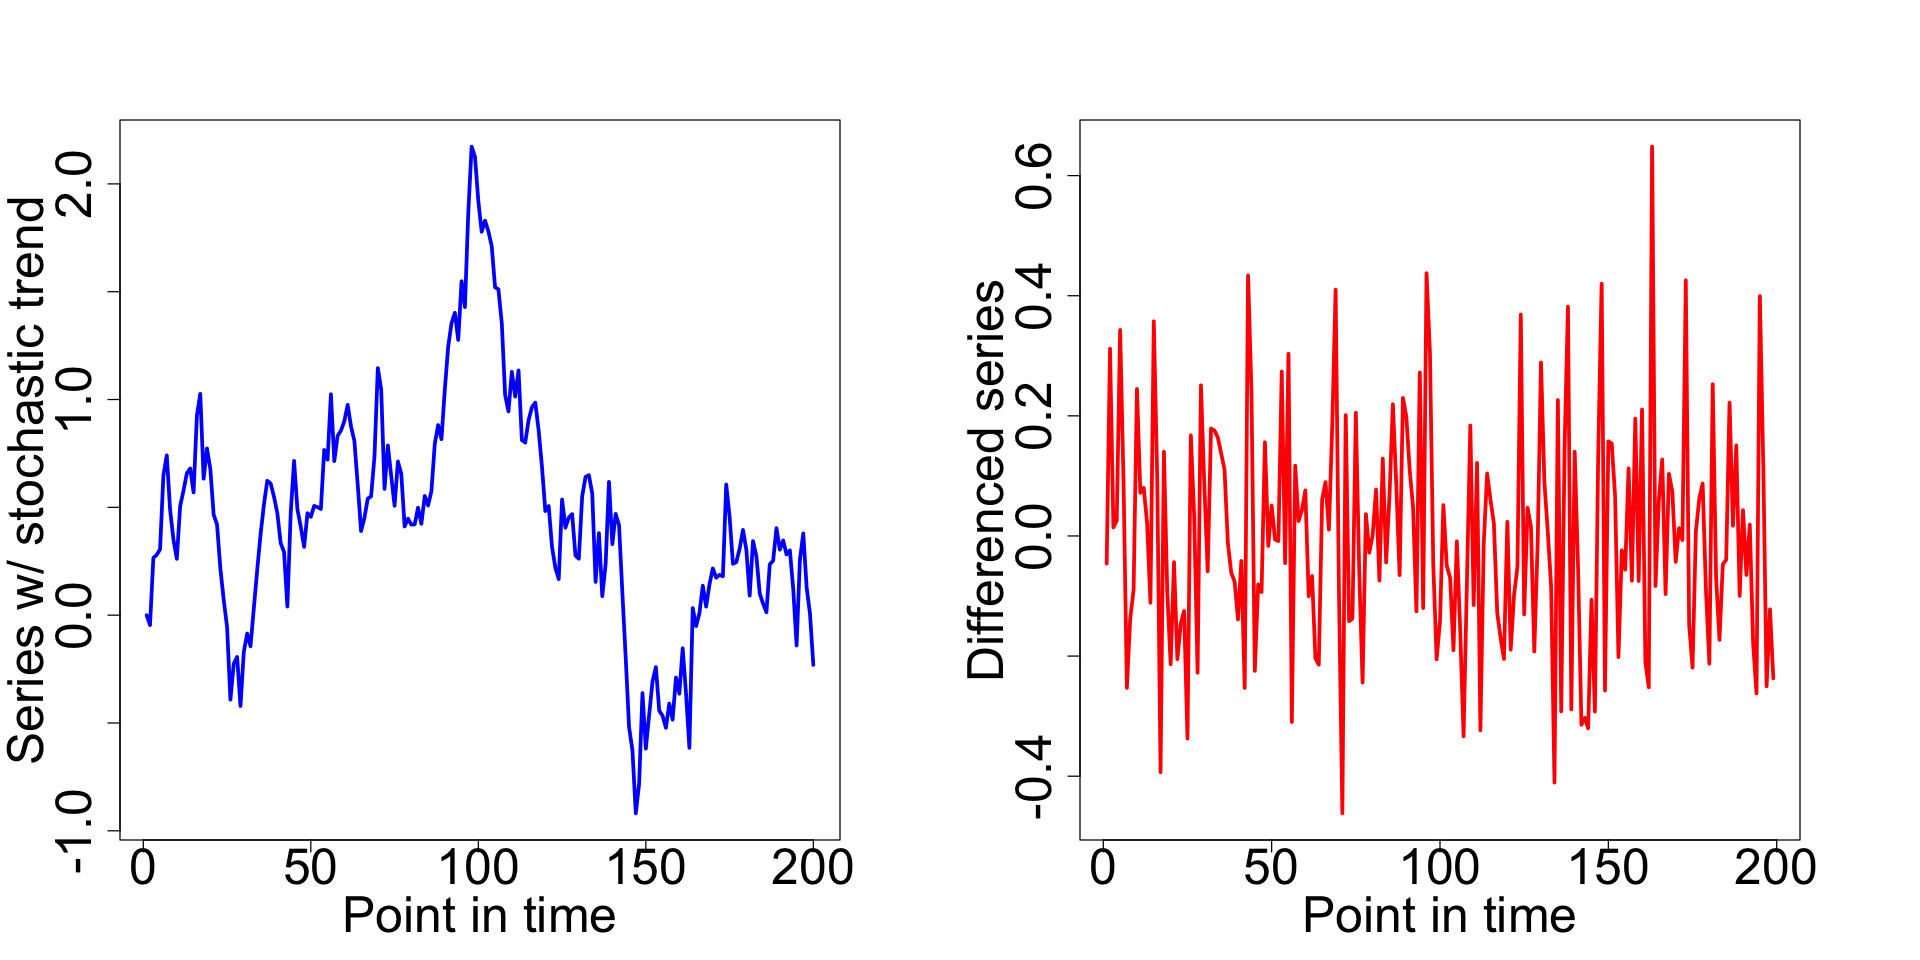

In [16]:
# Set plotting options: figure size for output
options(repr.plot.width=16, repr.plot.height=8)

# Set margins and layout:
# mar = margins (bottom, left, top, right)
# mfrow = number of plots (1 row, 2 columns → two plots side by side)
par(mar = c(5, 5, 5, 5), mfrow = c(1,2))

# ------------------------
# Plot the original series (ex.c: random walk without constant)
# ------------------------
plot(ex.c, type="l", 
     col="blue",                     # Line color = blue
     lwd=3,                          # Line width
     cex.lab=2.5, cex.axis=2.5,      # Scale up axis labels and tick labels
     xlab= "Point in time",          # X-axis label
     ylab="Series w/ stochastic trend")  # Y-axis label

# ------------------------
# Plot the differenced series (ex.c.diff = Δy_t)
# ------------------------
plot(ex.c.diff, type="l", 
     col="red",                      # Line color = red
     lwd=3,                          # Line width
     cex.lab=2.5, cex.axis=2.5,      # Scale up axis labels and tick labels
     xlab= "Point in time",          # X-axis label
     ylab="Differenced series")      # Y-axis label


<img src="COLOURBOX33413532.jpg" width="200">

# Can differencing fix the problem of a deterministic trend?


If the data generating process is of the form (example e), 

$$y_t=\beta_0 + \beta_1t + y_{t-1}+\epsilon_t,$$

i.e., contains both deterministic and stochastic trends, differentiating the series will not eliminate the deterministic trend component.

$\Delta y_t=y_t-y_{t-1}$

$\Delta y_t=\beta_0 + \beta_1t + y_{t-1}+\epsilon_t - y_{t-1}$

$\Delta y_t=\beta_0 + \beta_1\color{red}{t} +\epsilon_t$

If the data generating process is of the form (example a), 

$$y_t=\beta_0 + \beta_1t +\epsilon_t,$$

i.e., contains only deterministic trend, differentiating the series will eliminate the deterministic trend component.

$\Delta y_t=y_t-y_{t-1}$

$\Delta y_t=\beta_0 + \beta_1t +\epsilon_t - (\beta_0 + \beta_1(t-1) +\epsilon_{t-1})$

$\Delta y_t=\beta_1 + \epsilon_t + \epsilon_{t-1}$

However, differentiating a process that is only subject to a deterministic trend leads to **over-differentiation**: instead of the true shocks $(\epsilon_t)$, we now have $(\Delta \epsilon_t)$. This throws away information and distorts the dynamics.

## Takeaways

- **Trend-stationary (only deterministic trend):**  
  → Detrend. Differencing would destroy useful information.  

- **Difference-stationary (stochastic trend, possibly with deterministic trend):**  
  → Difference once to remove the unit root. If a deterministic trend remains, detrend after differencing.  

- **Never difference twice unless the series is truly I(2).**  
  Over-differencing throws away information and alters the dynamics.

<img src="COLOURBOX33413532.jpg" width="200">

# Augmented Dickey–Fuller (ADF)

Testing for a unit root using ADF requires manowuverung between the following three regression equations:

(A) $\Delta y_t = \color{blue}{\alpha} + \color{magenta}{\beta t} + \color{red}{\gamma y_{t-1}} + \sum_{i=1}^pδ_i \Delta y_{t-i}+ ϵ_t$

(B) $\Delta y_t = \color{blue}{\alpha} + \color{red}{\gamma y_{t-1}} + \sum_{i=1}^pδ_i \Delta y_{t-i}+ ϵ_t$

(C) $\Delta y_t = \color{red}{\gamma y_{t-1}} + \sum_{i=1}^pδ_i \Delta y_{t-i}+ ϵ_t$




# Enders' Iterative Procedure

The **φ-tests** are *joint tests* that always include $\gamma = 0$ (the unit root null).  
They are not “pure deterministic term tests.”

- **φ₃:** $H_0:\,\gamma = 0 \ \text{and}\ \beta = 0$  
- **φ₂:** $H_0:\,\gamma = 0 \ \text{and}\ \alpha = 0 \ \text{and}\ \beta = 0$  
- **φ₁:** $H_0:\,\gamma = 0 \ \text{and}\ \alpha = 0$


1. **Start with model (A)** (constant + trend):  
   $$
   \Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \sum_{i=1}^p \delta_i \Delta y_{t-i} + \varepsilon_t
   $$

   - Compute **τ₃** (tests $H_0:\gamma=0$).  
   - Compute **φ₂** and **φ₃**:  
     - **φ₃:** if you **reject**, keep the trend.  
     - If you **cannot reject φ₃**, test φ₂:  
       - **φ₂ rejected** → drop trend, keep constant → go to model (B).  
       - **φ₂ not rejected** → drop both trend and constant → go to model (C).  



2. **In the chosen model (A, B, or C):**  
   - Perform the **τ-test** on $H_0:\gamma=0$ using the correct critical values.  
   - If τ rejects → the series is **stationary** (possibly around a mean or a trend).  
   - If τ does not reject → the series has a **unit root** (stochastic trend).  

#  ADF test in R

 Syntax       

           library(urca)
           summary(ur.df(ex.a, type='drift', lags=8, selectlags="AIC"))

type = "trend", includes $\color{blue}{\alpha} + \color{magenta}{\beta t} + \color{red}{\gamma y_{t-1}}$

        tau3: test $H_0: \gamma = 0$

        phi2: test $H_0: \gamma = \alpha = \beta = 0$

        phi3: test $H_0: \gamma = \beta = 0$

type = "drift", includes $\color{blue}{\alpha} + \color{red}{\gamma y_{t-1}}$

        tau2: test $H_0: \gamma = 0$

        phi1: test $H_0: \gamma = \alpha = 0$

 type = "none", includes $\color{red}{\gamma y_{t-1}}$

        tau1: test $H_0: \gamma = 0$

 Lag length (lags)

        lags = 1 → include up to 1 lag of $\Delta y_{t-i}$

        lags = 8 → include up to 8 lags

        lags = k → include up to $k$ lags

Lag selection (selectlags)

        selectlags = "AIC" → AIC chooses the optimal lag length between 0 and lags

        selectlags = "BIC" → BIC chooses the optimal lag length between 0 and lags

### φ-tests in the ADF framework

- **φ₁** (only relevant in the **drift** model, i.e. `type = "drift"`):  
  - Tests **H₀: α = 0** (no constant).  
  - If rejected → keep the constant.

- **φ₂** (relevant in the **trend** model, i.e. `type = "trend"`):  
  - Tests **H₀: α = 0 and β = 0** (no constant, no trend).  
  - If rejected → you need at least a constant.

- **φ₃** (also relevant in the **trend** model):  
  - Tests **H₀: β = 0** (no trend).  
  - If rejected → you need the trend.


# Testing for a unit root in R 

**Example a:**
 $$\color{blue}{y_t = \beta_0 +\beta_1y_{t-1}+ \beta_2t+ϵ_t}$$

In [ ]:
# install.packages("urca")


The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//RtmpKAmB8R/downloaded_packages


In [18]:
library(urca)
summary(ur.df(ex.a, type='trend', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45413 -0.12172 -0.01179  0.12125  0.59979 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 46.73937    6.16594   7.580 1.61e-12 ***
z.lag.1     -1.16065    0.15648  -7.417 4.18e-12 ***
tt           0.46412    0.06259   7.416 4.22e-12 ***
z.diff.lag1  0.10125    0.13637   0.742   0.4587    
z.diff.lag2  0.02452    0.10662   0.230   0.8184    
z.diff.lag3  0.12064    0.07268   1.660   0.0986 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1875 on 185 degrees of freedom
Multiple R-squared:  0.5508,	Adjusted R-squared:  0.5387 
F-statistic: 45.37 on 5 and 185 DF,  p-value: < 2.2e-16


Value of test-statistic is: -7.4174

We started with the most general ADF regression (including constant and trend). The φ-tests reject the hypotheses that we can drop the constant or the trend, so both terms are required. The τ₃ test rejects the null of a unit root, meaning the process is not difference-stationary but instead trend-stationary. This implies that once we remove the deterministic linear trend, the remaining fluctuations are stationary. In other words, the series wanders around a predictable upward/downward sloping path, rather than following a stochastic trend.

# Exercise:

Test for unit root using simulated data from exampels b) through e).

In [19]:
summary(ur.df(ex.b, type='trend', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45530 -0.11462 -0.01743  0.12388  0.60814 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.020e+00  1.142e-01   8.931 4.19e-16 ***
z.lag.1     -7.112e-01  1.098e-01  -6.475 8.28e-10 ***
tt           1.184e-01  1.830e-02   6.470 8.55e-10 ***
z.diff.lag1  4.501e-02  1.028e-01   0.438   0.6621    
z.diff.lag2  3.248e-05  8.736e-02   0.000   0.9997    
z.diff.lag3  1.254e-01  7.282e-02   1.722   0.0868 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1881 on 185 degrees of freedom
Multiple R-squared:  0.3553,	Adjusted R-squared:  0.3379 
F-statistic: 20.39 on 5 and 185 DF,  p-value: 3.458e-16


Value of test-statist

- null: The series has a unit root (non-stationary).
- alt: The series is stationary (around a mean or trend, depending on specification).

since −6.475 < −3.99, we reject the unit root null at 1% level that the series has a unit root (i.e. we conclude that the series is trend-stationary), it is stationary once you account for the deterministic trend.

In [23]:
summary(ur.df(ex.b, type='drift', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47661 -0.13544 -0.02039  0.13025  0.57621 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5110662  0.0629425   8.120 6.70e-14 ***
z.lag.1     -0.0004924  0.0015646  -0.315  0.75333    
z.diff.lag1 -0.5185700  0.0726479  -7.138 2.15e-11 ***
z.diff.lag2 -0.5149625  0.0807256  -6.379 1.42e-09 ***
z.diff.lag3 -0.2697158  0.0852766  -3.163  0.00183 ** 
z.diff.lag4 -0.3785666  0.0852835  -4.439 1.56e-05 ***
z.diff.lag5 -0.1651625  0.0819623  -2.015  0.04536 *  
z.diff.lag6 -0.1767727  0.0734603  -2.406  0.01711 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1984 on 183 degrees of freedom
Multiple R-squared:   0.29,	Adju

- null: the series has a unit root (non-stationary).
- alt: the series is stationary around a constant. (no trend)

p value of z.lag.1 = 0.75333 which is nowhere near significant, so we fail to reject the null that the series has a unit root (i.e. we conclude that the series is difference-stationary).

The reported test statistic is that t-value on z.lag.1: −0.315.
Critical values (tau2) are −3.46 (1%), −2.88 (5%), −2.57 (10%).
Since −0.315 is far greater (less negative) than any critical value, we fail to reject the null, i.e. the series has a unit root (is difference-stationary).